# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [2849]:
# importing all necessary modules 
import numpy as np
import statsmodels.api as sm
from scipy import stats
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from numpy.linalg import matrix_power
from numpy.linalg import multi_dot
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
import scipy as sp
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn import linear_model
import scipy.stats as sps
from sklearn.decomposition import PCA
from statistics import mode
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from scipy.stats import t
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [2850]:
#To always have plots with no scroll bar in Jupyter notebook

In [2851]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2852]:
# Setting locale
import locale
locale.setlocale(locale.LC_ALL, '')

'English_United States.1252'

## Prediction of car prices
###  Goal is to understand what factors make a car more or leass expensive 
###  Provide clear recommendations to a used car dealership

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2853]:
# loading data

In [2854]:
df=pd.read_csv("C:\\Users\\ajit2\\Desktop\\Berkley Course\\From Berkley\\Module 11\\data\\vehicles.csv")

In [2855]:
# checking few rows of data

In [2856]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [2857]:
# Checking dimensions of dataframe

In [2858]:
df.shape

(426880, 18)

In [2859]:
# Checking other relvant information in the  dataframe. 
# The dataframe has 17 columns of which 4 are numerical columns and the rest categorical
# 14 columns have null values and imputing missing values will be important

In [2860]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [2861]:
# Checking for total "isnull" rows in dataframe

In [2862]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [2863]:
#checking for duplicates in id column
# this is assuming that id's form a unique record for sale of one car
# this shows the data has no duplicates

In [2864]:
sum(df.duplicated(subset = 'id')) == 0

True

In [ ]:
# Understanding the target variable i.e. price
# price has a min of 0, max of 3Billion with a mean price of around 75K USD
# median price is around USD 13,950 suggesting a very skewed towards right distribution 

In [2865]:
df.price.describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

In [2866]:
# Slicing the price range of cars into 6 brackets to see the spread of unit sales across different
# price points in dataset

In [2867]:
bins = [-np.inf,100,15000,25000,50000,75000,100000,150000,np.inf]
labels = ['price less that 100' ,'price >= 500 and price<15000',\
          'price >= 15000 & < 25000','price >= 25000 & < 50000','price >= 50000 & < 75000',\
          'price >= 75000 & < 100000',\
          'price >= 100000 & < 150000','price >= 150000']
df['price_bins'] = pd.cut(df.price, bins=bins,labels=labels,  right=False, include_lowest=True)

In [2868]:
# checking for "total sales" units wise and dollarwise comming from each price range
# This clearly shows that majority of the unit sales(~97%) are comming from <50K price point
# It also shows that majority of the revenue(~80%) comes from >50K price point cars

In [2869]:
dfpricebins=df.groupby(['price_bins'],as_index=False).agg({'id': 'count', 'price':'sum'})
dfpricebins['percentage total unit sales per price point bucket']=(dftest['id']/dftest.id.sum())*100
dfpricebins['percentage of total revenue sales per price point bucket']=(dftest['price']/dftest.price.sum())*100
dfpricebins

,price_bins,id,price,percentage total unit sales per price point bucket,percentage of total revenue sales per price point bucket
0,price less that 100,36222,107878,8.485289,0.000336
1,price >= 500 and price<15000,192553,1457433120,45.107056,4.540154
2,price >= 15000 & < 25000,83919,1664361212,19.658686,5.184770
3,price >= 25000 & < 50000,101145,3459620518,23.694012,10.777311
4,price >= 50000 & < 75000,10694,638271687,2.505154,1.988326
5,price >= 75000 & < 100000,1650,138336781,0.386525,0.430943
6,price >= 100000 & < 150000,490,58550680,0.114786,0.182395
7,price >= 150000,207,24684281411,0.048491,76.895765


In [2873]:
# Showing the break up of unit sales by the various price point brqackets

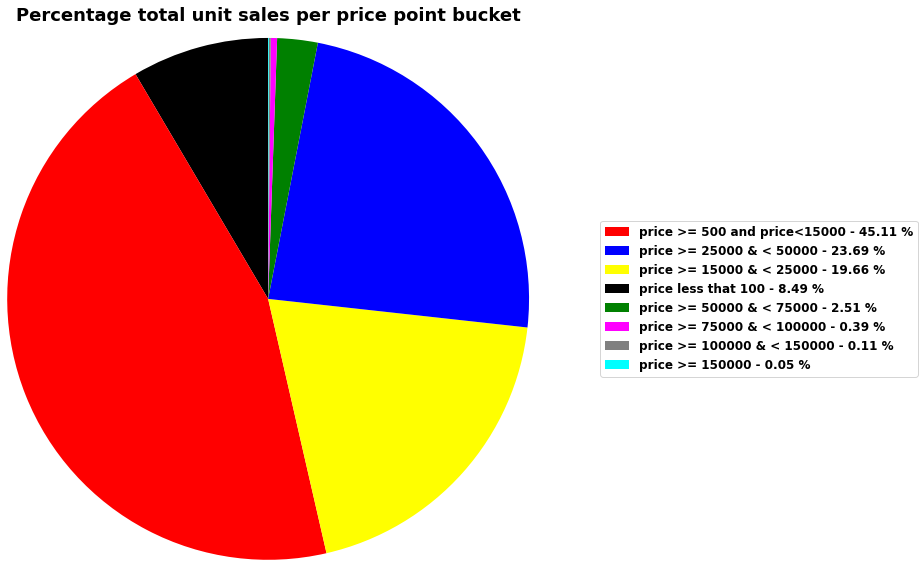

In [2871]:
dfpie1=dfpricebins[['price_bins','percentage total unit sales per price point bucket']]

x =dfpie1.price_bins
y =dfpie1['percentage total unit sales per price point bucket']
colors = ['black','red','yellow','blue','green','magenta','grey','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=3)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left',  bbox_to_anchor=(2.0, 0.5),
           fontsize=12)

plt.savefig('piechart.png', bbox_inches='tight')
plt.title("Percentage total unit sales per price point bucket",fontweight="bold",fontsize=18,y=1.75);

In [2872]:
# Showing the break up of revenue by the various price point brackets

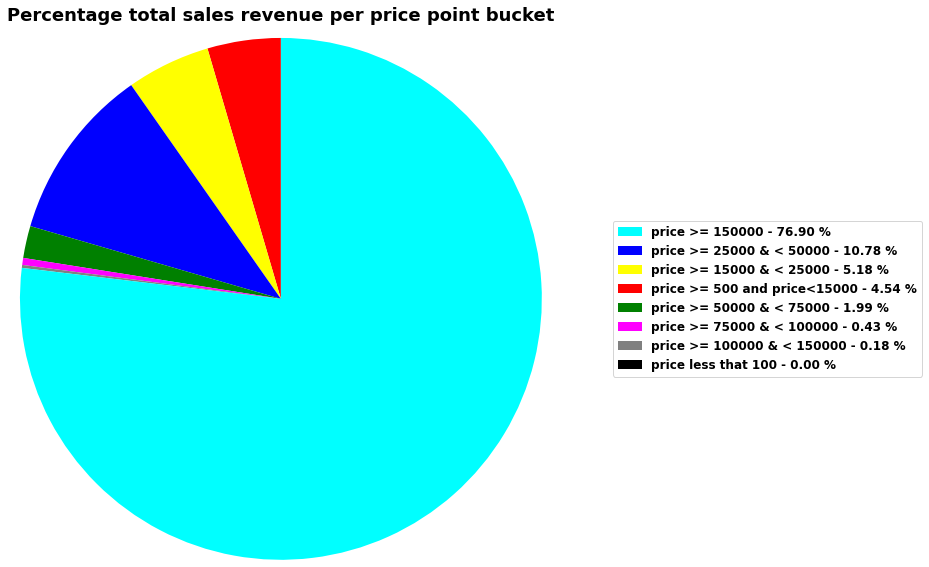

In [2874]:
dfpie2=dfpricebins[['price_bins','percentage of total revenue sales per price point bucket']]
x =dfpie2.price_bins
y =dfpie2['percentage of total revenue sales per price point bucket']
colors = ['black','red','yellow','blue','green','magenta','grey','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=3)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left',  bbox_to_anchor=(2.0, 0.5),
           fontsize=12)

plt.savefig('piechart.png', bbox_inches='tight')
plt.title("Percentage total sales revenue per price point bucket",fontweight="bold",fontsize=18,y=1.75);

### Conclusions from above
#### From the above we can see the following from an overall business stand point:
#### Total revune is 32.1 Billion USD with total unit sales around 426K
#### ~ 90%(377K ) of the unit sales are comming from cars having a price point in the between of 100 USD and 50K USD
#### Revenuewise the "100 USD to 50K USD" price point contribute to 20% (6.5B)of the total revenue
#### Only 1 % of the unit sales(~13K) comes from >50K USD price point cars however they contribute to ~80% (25B)
#### of total revenue


In [2875]:
# Slicing the odometer mileage into 6 brackets to see the spread of mean price by odometer bracket

In [2876]:
bins = [-np.inf,75000,150000,225000,300000,500000,1000000,np.inf]
labels = ['odometer less that 75000' ,'odometer >= 75000 & < 150000','odometer >= 150000 & < 2250000',
          'odometer >= 225000 & < 300000',\
          'odometer >= 300000 & < 500000',\
          'odometer >= 500000 & < 1000000','odometer >= 1000000']
df['odometer_bins'] = pd.cut(df.odometer, bins=bins,labels=labels,  right=False, include_lowest=True)

In [2877]:
# Checking for "total sales" units wise and dollarwise comming from each odometer bracket range
#  shows that majorty of unit car sale are comming from cars with <300K miles in odometer

In [2878]:
df.groupby(['odometer_bins']).agg({'id': 'count','price':'mean'})

,id,price
odometer_bins,,
odometer less that 75000,187167,4.820354e+04
odometer >= 75000 & < 150000,157473,7.199605e+04
odometer >= 150000 & < 2250000,64811,1.442874e+05
odometer >= 225000 & < 300000,9769,7.886535e+03
odometer >= 300000 & < 500000,1837,8.152360e+04
odometer >= 500000 & < 1000000,784,1.279856e+06
odometer >= 1000000,639,1.750458e+06


In [2879]:
# Plot of price by odometer bins shows that mean price decreases as odometer miles increases till 300K miles
# after 300K miles there is an increase in mean prices
# The price has been tranformed to Log 10 scale due to the large range in data to enabling comparison by plotting

''

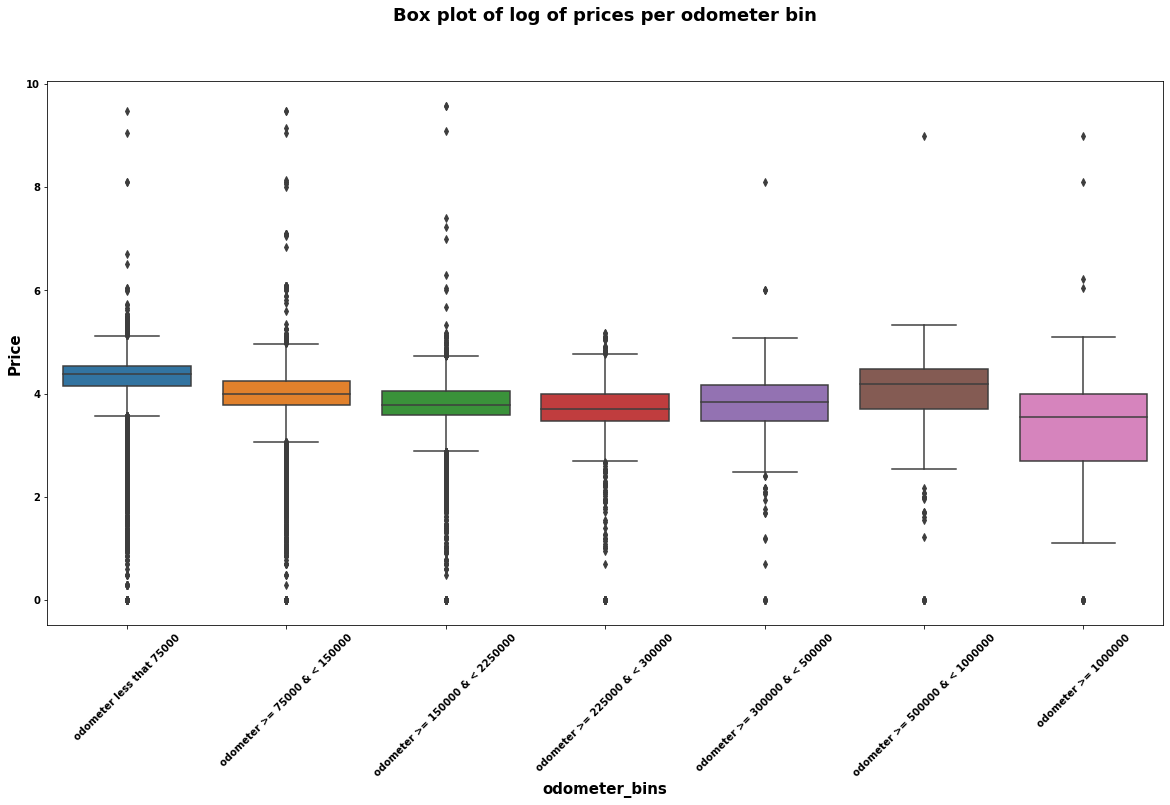

In [2880]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.odometer_bins,y=np.log10(df.price),data=df)
plt.xticks(rotation=45)
plt.xlabel('odometer_bins', fontweight='bold',fontsize=15)
plt.ylabel('Price', fontweight='bold',fontsize=15)
plt.title("Box plot of log of prices per odometer bin",fontweight="bold",fontsize=18,y=1.1)
;

In [2881]:
#checking for the units and total sales dollars in 2022


In [2882]:
df.query('year==2022').groupby(['year']).agg({'id': 'count','price':'mean'})

,id,price
year,,
2022.0,133,27367.052632


In [2884]:
# As both the sales units and dollars are small ,dropping 2022 to create a car age column which is more easily interpretable
# Keeping the year 2022 would have been an hinderance as it would have resulted in having a zero in car age column

In [2885]:
# Creating a new dataframe with only cars before 2022

In [2886]:
df1=df.query('year<2022')

In [2887]:
# creating a new column to determine how old a car is compared to the current year i.e. 2022
# car age column is created as it is a more understandable unit than just "year" as mentioned before

In [2888]:
df1['current_Year'] = 2022
df1['car_age'] = (df1['current_Year'] - df1['year'])

In [2889]:
## The cars in the dataset have a mean age of 10 years (median age is also 9 years) 

In [2890]:
df1['car_age'].describe()

count    425542.000000
mean         10.768173
std           9.451680
min           1.000000
25%           5.000000
50%           9.000000
75%          14.000000
max         122.000000
Name: car_age, dtype: float64

In [2891]:
# Slicing the car age into 6 brackets to see the spread of unit sales and revenue in dataset by these groups
bins = [-np.inf,5,10,20,30,100,np.inf]
labels = ['car age less that 5 years' ,'car age >=5 & <10 years','car age >=10 & <20 years', 'car age >=20 & <30 years',\
          'care age >=30 & <100 years','car age >= 100 years']
df1['car_age_bins'] = pd.cut(df1.car_age, bins=bins,labels=labels,  right=False, include_lowest=True)

In [2892]:
# Standard cars usually last around 12 years or 200,000 miles per internet
# Checking for "total sales" units wise and dollarwise mean comming from each age


In [2893]:
df1.groupby(['car_age_bins']).agg({'id': 'count','price':'mean'})

,id,price
car_age_bins,,
car age less that 5 years,83438,81200.131858
car age >=5 & <10 years,159469,20309.862356
car age >=10 & <20 years,143783,46635.783472
car age >=20 & <30 years,24636,464722.375467
care age >=30 & <100 years,14171,273923.412744
car age >= 100 years,45,44836.333333


### From the above we can see the following points from an overall business stand point from a next step standpoint:

#### Based on the above this analysis will focus on the following slice of data:
#### a---price  point more than 100 USD and less than <50k USD
#### b---odometer miles < 300K
#### c---car age less than 30 years and will exclude year 2022
#### This data will represent 96% (6.3 out of 6.5B)of revenue of the <50K price price segment market and
#### 86% of units sales
#### THis slicing has been done based on:
#### I--Not letting the few high price point impact regression slope and hence the coefficients magnitude
#### II--Assuming the few sales units(~ 3% or 13K units) of the high price point category requires more
#### personalized approach and factors will not be impacted by removing around 13K units
#### III -- The selected slice get the vast majority of the data driving unit sales and hence fit for use for the ultimate objective

In [1924]:
# creating a new data set based on the above

In [2056]:
df2=df1.query('odometer>0 and odometer<300000 and price>100 and price <50000 and car_age<31 and year<2022')

In [2905]:
# Remvoving some category variables created earlier 

In [2895]:
df2 = df2.assign(price_bins=df2.odometer_bins.cat.remove_unused_categories(),
                 odometer_bins=df2.odometer_bins.cat.remove_unused_categories(),\
                 car_age_bins=df2.car_age_bins.cat.remove_unused_categories(),\
               )

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

####  Exploratory Data analysis of the selected data

In [2897]:
# Box plot of price vs age of car
#the plot above shows that the mean price of car decreasing (for most part) with increasing age

''

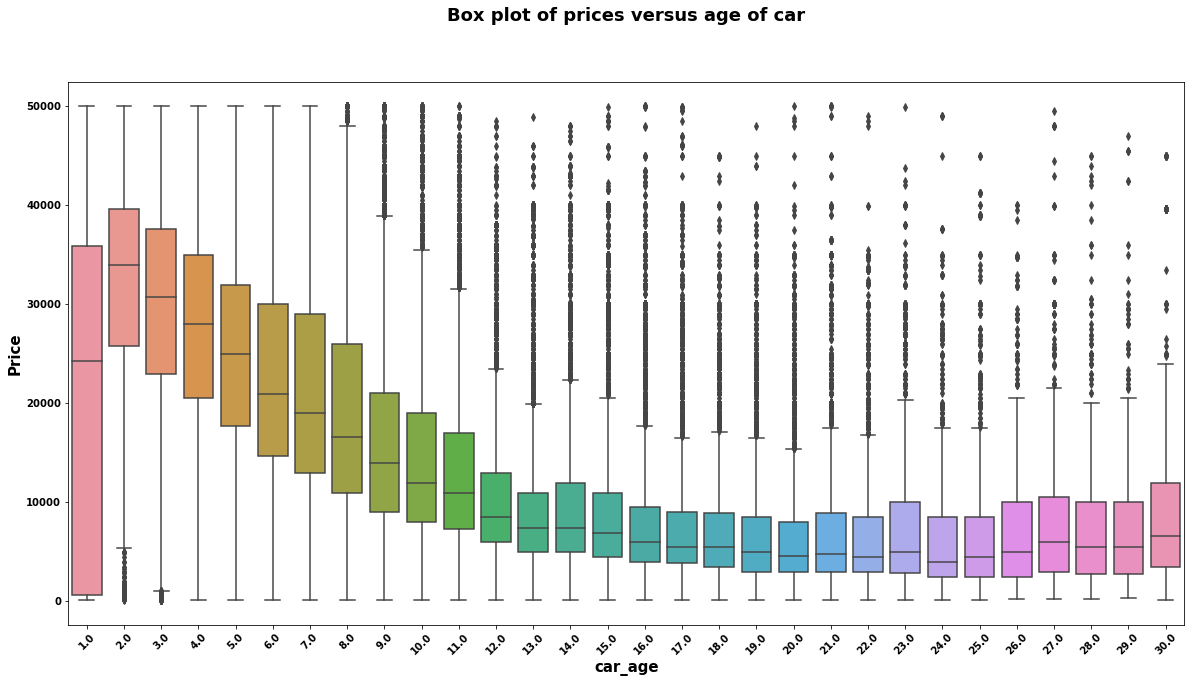

In [2898]:

plt.figure(figsize=(20,10))
sns.boxplot(x='car_age',y='price',data=df2)
plt.xticks(rotation=45)
plt.xlabel('car_age', fontweight='bold',fontsize=15)
plt.ylabel('Price', fontweight='bold',fontsize=15)
plt.title("Box plot of prices versus age of car",fontweight="bold",fontsize=18,y=1.1)
;

In [2899]:
# scatter plot of price vs odometer usage
#the plot below shows that the mean price of car decreaing with increasing odoometer mileage

''

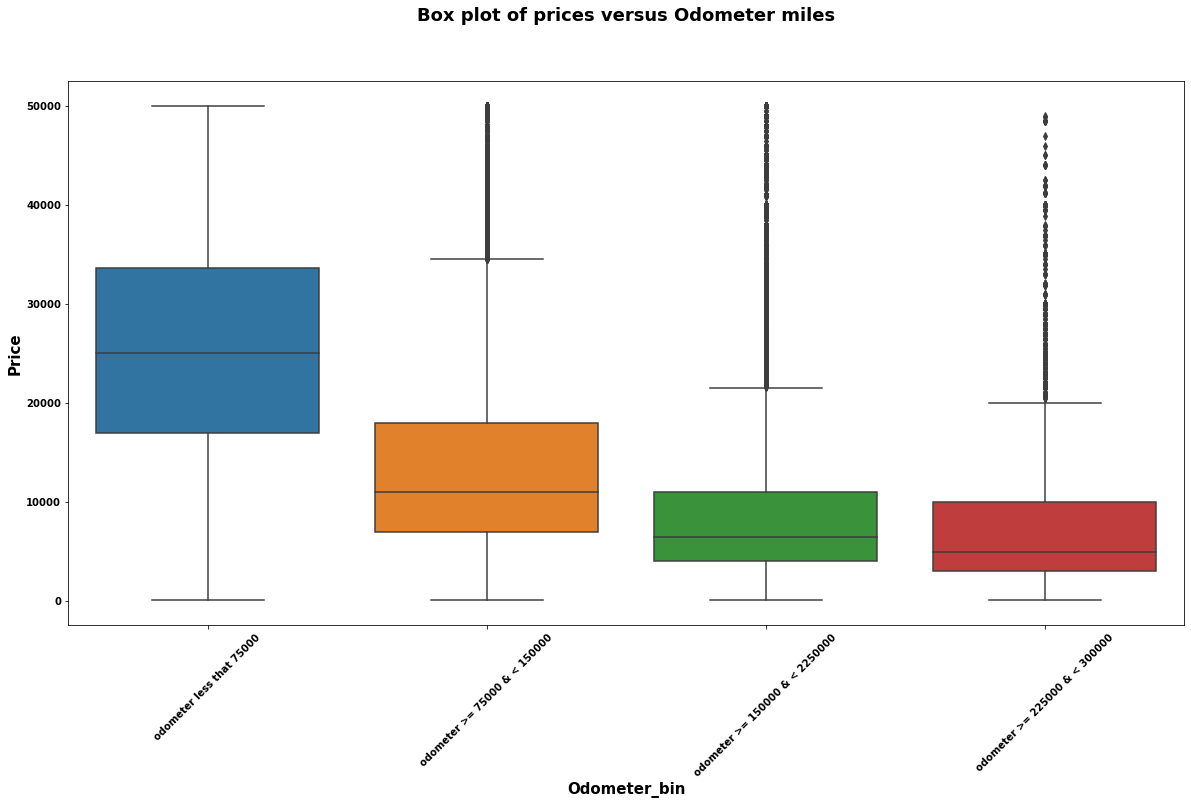

In [2900]:
plt.figure(figsize=(20,10))
sns.boxplot(x='odometer_bins', y='price',data=df2)
plt.xticks(rotation=45)
plt.xlabel('Odometer_bin', fontweight='bold',fontsize=15)
plt.ylabel('Price', fontweight='bold',fontsize=15)
plt.title("Box plot of prices versus Odometer miles",fontweight="bold",fontsize=18,y=1.1)
;


In [ ]:
## Checking for the most correlated values to Y

In [2901]:
df2[['price','car_age','odometer']].corr()['price'].sort_values(ascending=False).iloc[1:]


odometer   -0.546652
car_age    -0.592851
Name: price, dtype: float64

In [2902]:
#### Above shows a negative correlation of both age and odometer mileage to price of car. This was corroborated with the
#### plots above as well

## plots of  catergorical variables in the dataframe after slicing

In [2903]:
##Checking the lost of unique values in a dataframe

In [2904]:
df2.T.apply(lambda x: x.nunique(), axis=1)
df2.apply(pd.Series.nunique)


id               358562
region              404
price             13638
year                 30
manufacturer         41
model             23344
condition             6
cylinders             8
fuel                  5
odometer          93861
title_status          6
transmission          3
VIN               98678
drive                 3
size                  4
type                 13
paint_color          12
state                51
price_bins            4
odometer_bins         4
current_Year          1
car_age              30
car_age_bins          5
dtype: int64

In [2906]:
# checking dimension of the new slice of data 

In [2907]:
df2.shape

(358562, 23)

In [2908]:
## gettting an estimate of the mean price of various categorical variable values in relation to overall mean price

In [2909]:
#selecting columns with lower unique values to plot
feature=[ 'condition', 'cylinders', 'fuel','title_status', 'transmission', 'drive', 'type', 'paint_color']

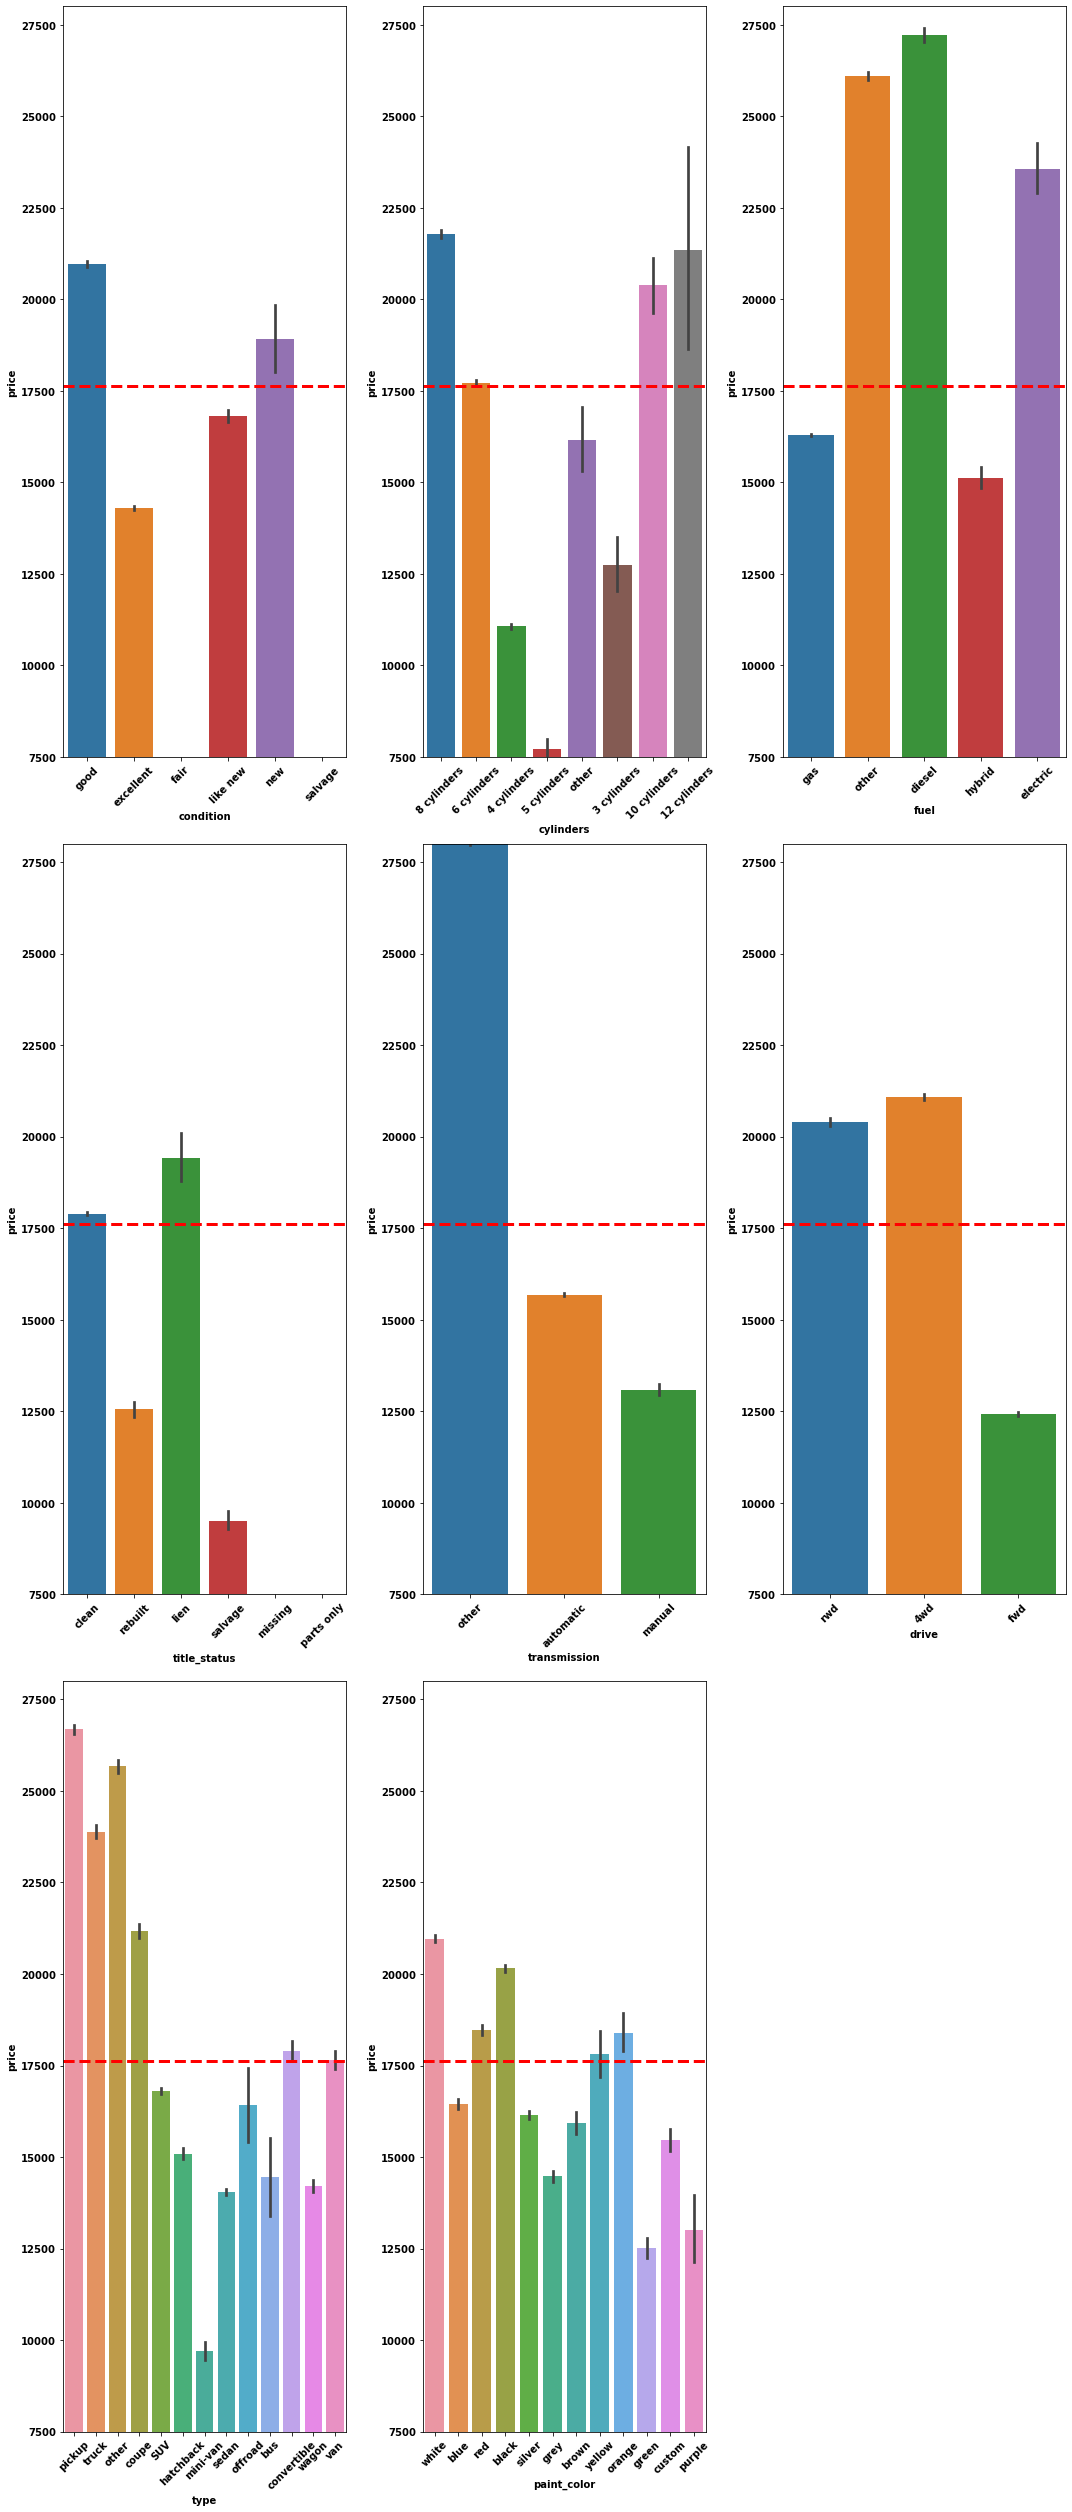

In [2910]:
plt.figure(figsize=(15,35))
for i in enumerate(feature):
        plt.subplot(3,3,i[0]+1)
        plt.ylim(7500,28000)
        fig=sns.barplot(x=i[1],y=df2['price'],data=df2)
        plt.axhline(df2.price.mean(), color='r', linestyle='dashed', linewidth=3)
        plt.xticks(rotation=45)
        plt.tight_layout(h_pad=1)

### From the obove we can see that the following features will demand higher than average price
#### condition : good and new
#### cylinders : 8 cylinders,6 cylinders,1o cylinders and 12 cylinders
#### fuel : Diesel,electric and other
#### title_status : clean and lien
#### transmission: other
#### drive : rwd and 4wd
#### type : pickup,truck,other,coup,convertible and van
#### paint:  white,red,black,yellow and orange


In [2911]:
# check the stats for other numeric columns

In [2912]:

df2.describe()

,id,price,year,odometer,current_Year,car_age
count,3.585620e+05,358562.000000,358562.000000,358562.000000,358562.0,358562.000000
mean,7.311482e+09,17622.885395,2012.234144,94181.733265,2022.0,9.765856
std,4.387006e+06,12125.565692,5.658537,61407.837095,0.0,5.658537
min,7.301583e+09,101.000000,1992.000000,1.000000,2022.0,1.000000
25%,7.308103e+09,7400.000000,2008.000000,40762.000000,2022.0,5.000000
50%,7.312606e+09,14998.000000,2013.000000,90270.000000,2022.0,9.000000
75%,7.315246e+09,26590.000000,2017.000000,137128.750000,2022.0,14.000000
max,7.317101e+09,49999.000000,2021.000000,299999.000000,2022.0,30.000000


In [2915]:
# plot of the y's distribution
# this still suggests a right skew

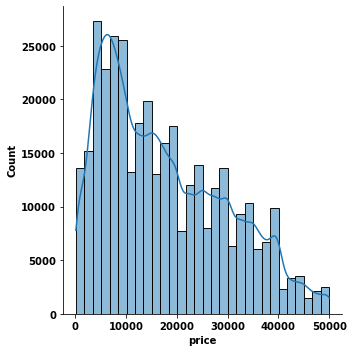

In [2914]:
sns.displot(df2, x='price', kde=True,bins=30);

In [2918]:
# preserving a copy for later use if needed
df3=df2.copy(deep=True)

## Handling missing of data

In [2919]:
# we can see from the information below that nulls from columns:
#condition, cylinders,fuel, title status,transmission,drive,type and paint_color needs  to be looked into
# These are important aspects that will impact pricing
# manufacturer,model,VIN are categroical columns that are planned on being dropped at a later stage


In [2920]:
df3.isnull().sum()

id                    0
region                0
price                 0
year                  0
manufacturer      10836
model              2915
condition        135031
cylinders        145935
fuel               2031
odometer              0
title_status       6677
transmission       1416
VIN              133097
drive            109270
size             258818
type              74348
paint_color      104409
state                 0
price_bins            0
odometer_bins         0
current_Year          0
car_age               0
car_age_bins          0
dtype: int64

In [2921]:
df3.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state', 'price_bins',
       'odometer_bins', 'current_Year', 'car_age', 'car_age_bins'],
      dtype='object')

## Filling missing values from data already exisiting in the data provided

In [2922]:
# trying to fill blanks using the techincal details of exsiting models

In [2923]:
dfmodel=df3.drop(['id', 'region', 'price','condition','odometer','title_status','VIN','state','size',\
                   'state', 
                  'price_bins', 
                  'current_Year',
                  'car_age','car_age_bins',
                    'odometer_bins'             
                 ],axis='columns')

In [2924]:
dfmodel

,year,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color
27,2014.0,gmc,sierra 1500 crew cab slt,8 cylinders,gas,other,NaN,pickup,white
28,2010.0,chevrolet,silverado 1500,8 cylinders,gas,other,NaN,pickup,blue
29,2020.0,chevrolet,silverado 1500 crew,8 cylinders,gas,other,NaN,pickup,red
30,2017.0,toyota,tundra double cab sr,8 cylinders,gas,other,NaN,pickup,red
31,2013.0,ford,f-150 xlt,6 cylinders,gas,automatic,rwd,truck,black
...,...,...,...,...,...,...,...,...,...
426875,2019.0,nissan,maxima s sedan 4d,6 cylinders,gas,other,fwd,sedan,NaN
426876,2020.0,volvo,s60 t5 momentum sedan 4d,NaN,gas,other,fwd,sedan,red
426877,2020.0,cadillac,xt4 sport suv 4d,NaN,diesel,other,NaN,hatchback,white
426878,2018.0,lexus,es 350 sedan 4d,6 cylinders,gas,other,fwd,sedan,silver


In [2925]:
# removing duplicate combinations from the data

In [2926]:
dfmodel.drop_duplicates(subset=['year', 'manufacturer', 'model','cylinders','fuel','transmission','drive','type','paint_color'],inplace=True)
dfmodel

,year,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color
27,2014.0,gmc,sierra 1500 crew cab slt,8 cylinders,gas,other,NaN,pickup,white
28,2010.0,chevrolet,silverado 1500,8 cylinders,gas,other,NaN,pickup,blue
29,2020.0,chevrolet,silverado 1500 crew,8 cylinders,gas,other,NaN,pickup,red
30,2017.0,toyota,tundra double cab sr,8 cylinders,gas,other,NaN,pickup,red
31,2013.0,ford,f-150 xlt,6 cylinders,gas,automatic,rwd,truck,black
...,...,...,...,...,...,...,...,...,...
426808,2005.0,chevrolet,silverado 1500 lt 4x4,8 cylinders,gas,automatic,4wd,truck,blue
426813,1998.0,ford,explorer,6 cylinders,gas,automatic,NaN,NaN,NaN
426815,1996.0,NaN,96 Suburban,8 cylinders,gas,automatic,NaN,SUV,brown
426833,1997.0,jaguar,xk8 convertible,8 cylinders,gas,automatic,rwd,convertible,white


In [2927]:
# dropping rows which do not have manufacturer or model information

In [2928]:
dfmodel.dropna(subset=['manufacturer','model'],inplace=True)
dfmodel

,year,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color
27,2014.0,gmc,sierra 1500 crew cab slt,8 cylinders,gas,other,NaN,pickup,white
28,2010.0,chevrolet,silverado 1500,8 cylinders,gas,other,NaN,pickup,blue
29,2020.0,chevrolet,silverado 1500 crew,8 cylinders,gas,other,NaN,pickup,red
30,2017.0,toyota,tundra double cab sr,8 cylinders,gas,other,NaN,pickup,red
31,2013.0,ford,f-150 xlt,6 cylinders,gas,automatic,rwd,truck,black
...,...,...,...,...,...,...,...,...,...
426748,2014.0,ram,1500 sport 4x4,8 cylinders,gas,automatic,4wd,truck,white
426808,2005.0,chevrolet,silverado 1500 lt 4x4,8 cylinders,gas,automatic,4wd,truck,blue
426813,1998.0,ford,explorer,6 cylinders,gas,automatic,NaN,NaN,NaN
426833,1997.0,jaguar,xk8 convertible,8 cylinders,gas,automatic,rwd,convertible,white


In [2929]:
#Checking null values

In [2930]:
dfmodel.isnull().sum()

year                0
manufacturer        0
model               0
cylinders       48655
fuel             1095
transmission      712
drive           39207
type            33466
paint_color     38427
dtype: int64

In [2934]:
# checking the data frame 
# we see there are missing values

In [2932]:
dfmodel.sort_values(['year'])

,year,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color
157244,1992.0,chevrolet,suburban,8 cylinders,gas,automatic,NaN,SUV,NaN
94533,1992.0,ford,mustang,8 cylinders,gas,automatic,rwd,convertible,red
372835,1992.0,chevrolet,malibu,12 cylinders,gas,automatic,NaN,NaN,NaN
193739,1992.0,chrysler,new yorker,6 cylinders,gas,automatic,fwd,sedan,red
302047,1992.0,dodge,daytona,NaN,gas,automatic,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
24013,2021.0,jeep,cherokee latitude lux,6 cylinders,gas,automatic,NaN,SUV,NaN
24016,2021.0,toyota,corolla,NaN,gas,automatic,fwd,NaN,blue
24018,2021.0,jeep,cherokee latitude lux,6 cylinders,gas,automatic,4wd,SUV,NaN
53360,2021.0,toyota,tacoma,6 cylinders,gas,automatic,4wd,truck,green


In [2935]:
# filling the missing values by mode of the combination of year-manufacturer and model
# the assumption being this would be provide a close enough estimate of reality 

In [2936]:
dfmodelf=dfmodel.groupby(['year','manufacturer','model']).agg(pd.Series.mode).reset_index().dropna()
dfmodelf

,year,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color
0,1992.0,acura,integra,4 cylinders,gas,automatic,fwd,coupe,custom
1,1992.0,audi,classic,[],gas,automatic,[],[],[]
2,1992.0,bmw,318i,4 cylinders,gas,manual,[],[],[]
3,1992.0,bmw,325ic,6 cylinders,gas,automatic,rwd,convertible,red
4,1992.0,bmw,525i,6 cylinders,gas,automatic,rwd,sedan,yellow
...,...,...,...,...,...,...,...,...,...
46790,2021.0,volkswagen,tiguan,4 cylinders,gas,automatic,fwd,SUV,silver
46791,2021.0,volkswagen,tiguan 2.0t s,4 cylinders,gas,automatic,fwd,SUV,[]
46792,2021.0,volkswagen,tiguan 2.0t se,4 cylinders,gas,automatic,fwd,SUV,[]
46793,2021.0,volvo,xc40 save demo loaner,[],gas,automatic,fwd,SUV,[]


In [2937]:
#replacing [ ] values we can see above

In [2938]:
dfmodelf['cylinders'] = dfmodelf['cylinders'].str.replace("[", "")
dfmodelf['cylinders'] = dfmodelf['cylinders'].str.replace("]", "")
dfmodelf['drive'] = dfmodelf['drive'].str.replace("[", "")
dfmodelf['drive'] = dfmodelf['drive'].str.replace("]", "")
dfmodelf['type'] = dfmodelf['type'].str.replace("[", "")
dfmodelf['type'] = dfmodelf['type'].str.replace("]", "")
dfmodelf['manufacturer'] = dfmodelf['manufacturer'].str.replace("[", "")
dfmodelf['manufacturer'] = dfmodelf['manufacturer'].str.replace("]", "")
dfmodelf['model'] = dfmodelf['model'].str.replace("[", "")
dfmodelf['model'] = dfmodelf['model'].str.replace("]", "")
dfmodelf['fuel'] = dfmodelf['fuel'].str.replace("[", "")
dfmodelf['fuel'] = dfmodelf['fuel'].str.replace("]", "")
dfmodelf['transmission'] = dfmodelf['transmission'].str.replace("[", "")
dfmodelf['transmission'] = dfmodelf['transmission'].str.replace("]", "")
dfmodelf['paint_color'] = dfmodelf['paint_color'].str.replace("[", "")
dfmodelf['paint_color'] = dfmodelf['paint_color'].str.replace("]", "")


In [2939]:
# checking dataframe we can still see null

In [2114]:
dfmodelf

,year,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color
0,1992.0,acura,integra,4 cylinders,gas,automatic,fwd,coupe,custom
1,1992.0,audi,classic,NaN,gas,automatic,NaN,NaN,NaN
2,1992.0,bmw,318i,4 cylinders,gas,manual,NaN,NaN,NaN
3,1992.0,bmw,325ic,6 cylinders,gas,automatic,rwd,convertible,red
4,1992.0,bmw,525i,6 cylinders,gas,automatic,rwd,sedan,yellow
...,...,...,...,...,...,...,...,...,...
46790,2021.0,volkswagen,tiguan,4 cylinders,gas,automatic,fwd,SUV,silver
46791,2021.0,volkswagen,tiguan 2.0t s,4 cylinders,gas,automatic,fwd,SUV,NaN
46792,2021.0,volkswagen,tiguan 2.0t se,4 cylinders,gas,automatic,fwd,SUV,NaN
46793,2021.0,volvo,xc40 save demo loaner,NaN,gas,automatic,fwd,SUV,NaN


In [2940]:
dfmodelf.isnull().sum()

year                0
manufacturer        0
model               0
cylinders       10609
fuel             1837
transmission     1128
drive            9524
type             8185
paint_color     17103
dtype: int64

In [2941]:
# dropping null values

In [2942]:
dfmodelf=dfmodelf.dropna()
dfmodelf.isnull().sum()

year            0
manufacturer    0
model           0
cylinders       0
fuel            0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

In [2943]:
#renaming columns before joining dataframes
dfmodelf.rename(columns={'year':'year_a', 'manufacturer':'manufacturer_a','model':'model_a',\
                       'cylinders':'cylinders_a','fuel':'fuel_a','transmission':'transmission_a',\
                       'drive':'drive_a','type':'type_a','paint_color':'paint_color_a'}, inplace=True)

## Joining with orginal data frame

In [2944]:
# current exisitng null counts  in dataframe

In [2945]:

df3.isnull().sum()

id                    0
region                0
price                 0
year                  0
manufacturer      10836
model              2915
condition        135031
cylinders        145935
fuel               2031
odometer              0
title_status       6677
transmission       1416
VIN              133097
drive            109270
size             258818
type              74348
paint_color      104409
state                 0
price_bins            0
odometer_bins         0
current_Year          0
car_age               0
car_age_bins          0
dtype: int64

In [2962]:
df4=pd.merge(left=df3,right=dfmodelf,how='left',left_on=['year','manufacturer','model'],\
             right_on=['year_a','manufacturer_a','model_a'])
df4

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,car_age_bins,year_a,manufacturer_a,model_a,cylinders_a,fuel_a,transmission_a,drive_a,type_a,paint_color_a
0,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,...,car age >=5 & <10 years,2014.0,gmc,sierra 1500 crew cab slt,8 cylinders,gas,other,4wd,pickup,white
1,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,...,car age >=10 & <20 years,2010.0,chevrolet,silverado 1500,8 cylinders,gas,automatic,4wd,truck,black
2,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,...,car age less that 5 years,2020.0,chevrolet,silverado 1500 crew,8 cylinders,gas,other,4wd,pickup,black
3,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,...,car age >=5 & <10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,...,car age >=5 & <10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358557,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,...,car age less that 5 years,2019.0,nissan,maxima s sedan 4d,6 cylinders,gas,other,fwd,sedan,black
358558,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,...,car age less that 5 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358559,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,...,car age less that 5 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358560,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,...,car age less that 5 years,2018.0,lexus,es 350 sedan 4d,6 cylinders,gas,other,fwd,sedan,silver


In [2963]:
# current nulls in dataframe
df4.isnull().sum()


id                     0
region                 0
price                  0
year                   0
manufacturer       10836
model               2915
condition         135031
cylinders         145935
fuel                2031
odometer               0
title_status        6677
transmission        1416
VIN               133097
drive             109270
size              258818
type               74348
paint_color       104409
state                  0
price_bins             0
odometer_bins          0
current_Year           0
car_age                0
car_age_bins           0
year_a            182593
manufacturer_a    182593
model_a           182593
cylinders_a       182593
fuel_a            182593
transmission_a    182593
drive_a           182593
type_a            182593
paint_color_a     182593
dtype: int64

In [2964]:
#checking if we got any non null values from the process we undertook

In [2965]:

df4.query('cylinders.isnull() and cylinders_a.notnull()')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,car_age_bins,year_a,manufacturer_a,model_a,cylinders_a,fuel_a,transmission_a,drive_a,type_a,paint_color_a
20,7314854462,auburn,30590,2016.0,toyota,tacoma double cab sr5,good,NaN,other,30176.0,...,car age >=5 & <10 years,2016.0,toyota,tacoma double cab sr5,6 cylinders,gas,other,rwd,pickup,silver
38,7312824400,auburn,32990,2019.0,chevrolet,silverado 1500 ld,good,NaN,other,6897.0,...,car age less that 5 years,2019.0,chevrolet,silverado 1500 ld,8 cylinders,gas,automatic,4wd,pickup,silver
47,7311818339,auburn,18590,2018.0,honda,civic lx sedan 4d,good,NaN,gas,28942.0,...,car age less that 5 years,2018.0,honda,civic lx sedan 4d,4 cylinders,gas,other,fwd,sedan,white
66,7309828053,auburn,29990,2018.0,alfa-romeo,romeo stelvio ti sport,good,NaN,other,26978.0,...,car age less that 5 years,2018.0,alfa-romeo,romeo stelvio ti sport,4 cylinders,gas,other,4wd,hatchback,white
77,7308255063,auburn,43990,2019.0,jeep,wrangler unlimited sahara,good,NaN,gas,4362.0,...,car age less that 5 years,2019.0,jeep,wrangler unlimited sahara,6 cylinders,gas,automatic,4wd,SUV,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358532,7302115020,wyoming,4277,2005.0,honda,civic,NaN,NaN,gas,236787.0,...,car age >=10 & <20 years,2005.0,honda,civic,4 cylinders,gas,automatic,fwd,sedan,silver
358533,7302113078,wyoming,7877,2016.0,chevrolet,sonic,NaN,NaN,gas,108881.0,...,car age >=5 & <10 years,2016.0,chevrolet,sonic,4 cylinders,gas,automatic,fwd,sedan,white
358535,7302107829,wyoming,6577,2013.0,hyundai,elantra,NaN,NaN,gas,169396.0,...,car age >=5 & <10 years,2013.0,hyundai,elantra,4 cylinders,gas,automatic,fwd,sedan,red
358536,7302106121,wyoming,6977,2011.0,honda,civic,NaN,NaN,gas,112396.0,...,car age >=10 & <20 years,2011.0,honda,civic,4 cylinders,gas,automatic,fwd,sedan,black


In [2966]:
# Fill null values with columns from the newly created mode table where there is a value against null

In [2967]:
df4['cylinders'] = df4['cylinders'].fillna(df4['cylinders_a'])

In [2968]:
df4['fuel'] = df4['fuel'].fillna(df4['fuel_a'])

In [2969]:
df4['transmission'] = df4['transmission'].fillna(df4['transmission_a'])

In [2970]:
df4['drive'] = df4['drive'].fillna(df4['drive_a'])

In [2971]:
df4['type'] = df4['type'].fillna(df4['type_a'])

In [2972]:
df4['paint_color_a'] = df4['paint_color_a'].fillna(df4['paint_color_a'])

In [2957]:
#checking null values again

In [2973]:
df4.isnull().sum()

id                     0
region                 0
price                  0
year                   0
manufacturer       10836
model               2915
condition         135031
cylinders          86987
fuel                1695
odometer               0
title_status        6677
transmission         592
VIN               133097
drive              66920
size              258818
type               39408
paint_color       104409
state                  0
price_bins             0
odometer_bins          0
current_Year           0
car_age                0
car_age_bins           0
year_a            182593
manufacturer_a    182593
model_a           182593
cylinders_a       182593
fuel_a            182593
transmission_a    182593
drive_a           182593
type_a            182593
paint_color_a     182593
dtype: int64

In [2975]:
#dropping the additional columns added from mode table for filling Null values

In [2976]:
df4.drop(['year_a', 'manufacturer_a','model_a','cylinders_a','fuel_a','transmission_a','drive_a',\
          'type_a','paint_color_a' ],axis='columns',inplace=True)

In [2977]:
df4.isnull().sum()

id                    0
region                0
price                 0
year                  0
manufacturer      10836
model              2915
condition        135031
cylinders         86987
fuel               1695
odometer              0
title_status       6677
transmission        592
VIN              133097
drive             66920
size             258818
type              39408
paint_color      104409
state                 0
price_bins            0
odometer_bins         0
current_Year          0
car_age               0
car_age_bins          0
dtype: int64

## Above process helped reduce the null values in cylinders, fuel, transmission and drive and type by almost 50%

## Filling rest of the null values using mode of the total data

In [2978]:
df4.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state', 'price_bins',
       'odometer_bins', 'current_Year', 'car_age', 'car_age_bins'],
      dtype='object')

In [2979]:
cols = ['condition','cylinders', 'fuel','title_status', 'transmission',\
       'drive', 'type', 'paint_color']
df4[cols]=df4[cols].fillna(df4.mode().iloc[0])

In [2980]:
## Checking for remaining NA values

In [2981]:
df4.isna().sum()

id                    0
region                0
price                 0
year                  0
manufacturer      10836
model              2915
condition             0
cylinders             0
fuel                  0
odometer              0
title_status          0
transmission          0
VIN              133097
drive                 0
size             258818
type                  0
paint_color           0
state                 0
price_bins            0
odometer_bins         0
current_Year          0
car_age               0
car_age_bins          0
dtype: int64

### We see that all the null values in categorical columns have been filled
### size,VIN,manufacturer and model are columns that are  planned to be dropped

### Agregating categorical columns to reduce the number of variables for one hot encoding later
### This is done keeping pricing in mind
### Also checks will be done along the process if the relation of mean prices among these
### categroical variables changed due to filling of null values

#### Aggregating 'condition' columns values

In [2983]:
#Checking if there are any changes in the overall "condition" mean prices after filling nulls
# The plot below shows that this is in line with what we had before filling null values
# and hence filling the null values with the above state methodology did not skew the mean price of this 
# caetegory in any way

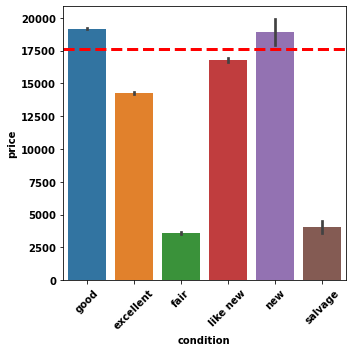

In [2984]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df4['condition'],y=df4['price'],data=df4)
plt.axhline(df4.price.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=45)
plt.tight_layout(h_pad=1)

In [2985]:
#Getting the list of unique values

In [2986]:
df4.condition.value_counts()

good         247341
excellent     86526
like new      18319
fair           5085
new             823
salvage         468
Name: condition, dtype: int64

In [2987]:
# grouping "condition" column values listed above into two categories 
#first category grouping all values above the mean price
# second category grouping the rest together

In [2988]:
condition_categories={'good':'condition_good_new',
                      'excellent':'condition_excellent_fair_likenew_salvage',\
                      'fair':'condition_excellent_fair_likenew_salvage', \
                      'like new':'condition_excellent_fair_likenew_salvage',\
                      'new':'condition_good_new',
                      'salvage':'condition_excellent_fair_likenew_salvage'}
df4['condition_category']=df4['condition'].map(condition_categories)

In [2989]:
# checking for null values after grouping

In [2990]:

df4.condition_category.isnull().sum()

0

In [2991]:
# checking if all grouped values appear

In [2992]:

df4.condition_category.value_counts()

condition_good_new                          248164
condition_excellent_fair_likenew_salvage    110398
Name: condition_category, dtype: int64

#### Aggregating 'cylinders' columns values

In [2993]:
#Checking if there are any changes in the overall "cylinders" mean prices after filling nulls
# The plot below shows that it is in line with what we had before filling null values
# and hence filling the null values with the above state methodology did not skew the mean price of this 
# caetegory in any way

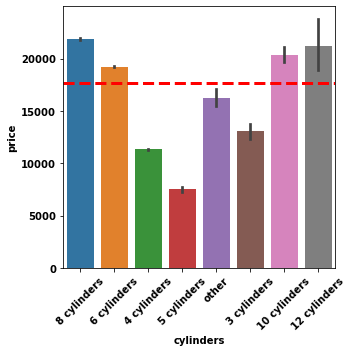

In [2994]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df4['cylinders'],y=df4['price'],data=df4)
plt.axhline(df4.price.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=45)
plt.tight_layout(h_pad=1)

In [2995]:
# grouping "cylinders" columns values listed above into two categories 
#first category grouping all values above the mean price
# second category grouping the rest together

In [2996]:
cylinders_categories={'8 cylinders':'cylinders_6_8_10_12',\
                       '6 cylinders':'cylinders_6_8_10_12',
                      '4 cylinders':'cylinders_4_5_other_3', \
                      '5 cylinders':'cylinders_4_5_other_3',\
                      'other':'cylinders_4_5_other_3',\
                      '3 cylinders':'cylinders_4_5_other_3',\
                      '10 cylinders':'cylinders_6_8_10_12',\
                       '12 cylinders':'cylinders_6_8_10_12'}
df4['cylinders_category']=df4['cylinders'].map(cylinders_categories)

In [2997]:
# checking for null values after grouping

In [2998]:
df4.cylinders_category.isnull().sum()

0

In [2999]:
# checking if all values appear

In [3000]:

df4.cylinders_category.value_counts()

cylinders_6_8_10_12      262560
cylinders_4_5_other_3     96002
Name: cylinders_category, dtype: int64

#### Aggregating 'fuel' columns values

In [3001]:
#Checking if there are any changes in the overall "fuel" mean prices after filling nulls
# The plot below shows that it is in line with what we had before filling null values
# and hence filling the null values with the above state methodology did not skew the mean price of this 
# caetegory in any way

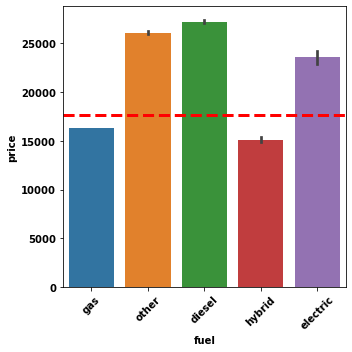

In [3002]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df4['fuel'],y=df4['price'],data=df4)
plt.axhline(df4.price.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=45)
plt.tight_layout(h_pad=1)

In [3003]:
# grouping "fuel" column values listed below into two categories 
#first category grouping all values above the mean price
# second category grouping the rest together


In [3004]:
Fuel_categories={'gas':'fuel_gas_hybrid',
                 'other':'fuel_other_diesel_electric', 
                 'diesel':'fuel_other_diesel_electric', 
                 'hybrid':'fuel_gas_hybrid', 
                 'electric':'fuel_other_diesel_electric'}
df4['fuel_category']=df4['fuel'].map(Fuel_categories)

In [3005]:
# checking for null values after grouping

In [3006]:
df4.fuel_category.isnull().sum()

0

In [3007]:
# checking if all values appear

In [3008]:
df4.fuel_category.value_counts()

fuel_gas_hybrid               311755
fuel_other_diesel_electric     46807
Name: fuel_category, dtype: int64

#### Aggregating 'title_status' column values

In [3009]:
#Checking if there are any changes in the overall "title_status" mean prices after filling nulls
# The plot below shows that it is in line with what we had before filling null values
# and hence filling the null values with the above state methodology did not skew the mean price of this 
# caetegory in any way

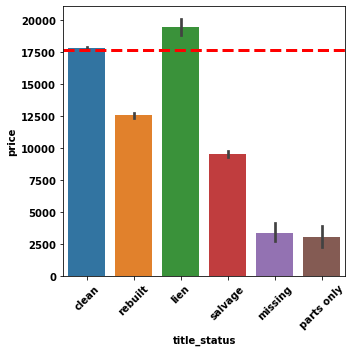

In [3010]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df4['title_status'],y=df4['price'],data=df4)
plt.axhline(df4.price.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=45)
plt.tight_layout(h_pad=1)

In [3011]:
# grouping "title_status" column values listed below into two categories 
#first category grouping all values above the mean price
# second category grouping the rest together




In [3012]:
title_status_categories={'clean':'title_status_clean_lien',\
                         'rebuilt':'title_status_rebuilt_salvage_missing_partsonly',\
                         'lien':'title_status_clean_lien',
                         'salvage':'title_status_rebuilt_salvage_missing_partsonly', \
                         'missing':'title_status_rebuilt_salvage_missing_partsonly',\
                         'parts only':'title_status_rebuilt_salvage_missing_partsonly'}
df4['title_status_category']=df4['title_status'].map(title_status_categories)

In [3013]:
# checking for null values

In [3014]:
df4.title_status_category.isnull().sum()

0

In [3015]:
# checking if all values appear

In [3016]:

df4.title_status_category.value_counts()

title_status_clean_lien                           347719
title_status_rebuilt_salvage_missing_partsonly     10843
Name: title_status_category, dtype: int64

#### Aggregating 'transmission' column values

In [3017]:
#Checking if there are any changes in the overall 'transmission' mean price after filling nulls
# The plot below shows that it is in line with what we had before filling null values
# and hence filling the null values with the above state methodology did not skew the mean price of this 
# caetegory in any way

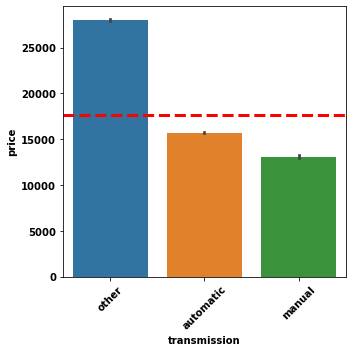

In [3018]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df4['transmission'],y=df4['price'],data=df4)
plt.axhline(df4.price.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=45)
plt.tight_layout(h_pad=1)

In [3019]:
# grouping "transmission" column values listed below into two categories 
#first category grouping all values above the mean price
# second category grouping the rest together


In [3020]:
transmission_categories={'other':'transmission_other',\
                         'automatic':'transmission_automatic_manual',\
                          'manual':'transmission_automatic_manual'}
df4['transmission_category']=df4['transmission'].map(transmission_categories)

In [3021]:
# checking for null values

In [3022]:
df4.transmission_category.isnull().sum()

0

In [3023]:
# checking if all values appear

In [3024]:
df4.transmission_category.value_counts()

transmission_automatic_manual    298916
transmission_other                59646
Name: transmission_category, dtype: int64

#### Aggregating 'drive' column values 

In [3025]:
#Checking if there are any changes in the overall "drive" mean price after filling nulls
# The plot below shows that it is in line with what we had before filling null values
# and hence filling the null values with the above state methodology did not skew the mean price of this 
# caetegory in any way


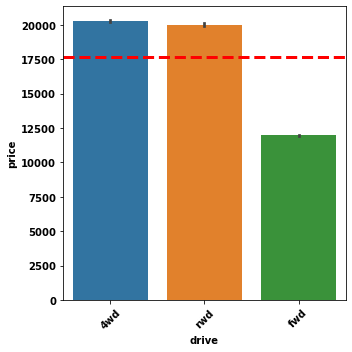

In [3026]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df4['drive'],y=df4['price'],data=df4)
plt.axhline(df4.price.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=45)
plt.tight_layout(h_pad=1)

In [3027]:
# grouping "drive" column values listed below into two categories 
#first category grouping all values above the mean price
# second category grouping the rest together


In [3029]:
drive_categories={'4wd':'drive_rwd_4wd',\
                  'rwd':'drive_rwd_4wd',\
                   'fwd':'fwd'}
df4['drive_category']=df4['drive'].map(drive_categories)

In [3030]:
# checking for null values

In [3031]:
df4.drive_category.isnull().sum()

0

In [3032]:
# checking if all values appear

In [3033]:
df4.drive_category.value_counts()

drive_rwd_4wd    246265
fwd              112297
Name: drive_category, dtype: int64

#### Aggregating 'type' column values

In [3034]:
#Checking if there are any changes in the overall "type" mean prices after filling nulls
# The plot below shows that it is in line with what we had before filling null values
# and hence filling the null values with the above state methodology did not skew the mean price of this 
# caetegory in any way


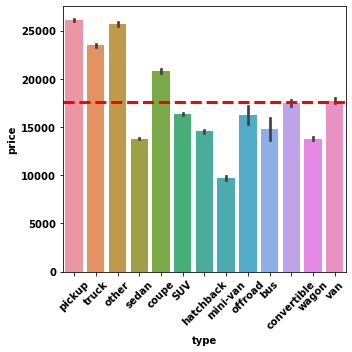

In [3035]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df4['type'],y=df4['price'],data=df4)
plt.axhline(df4.price.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=45)
plt.tight_layout(h_pad=1)

In [3036]:
# grouping "type" column values listed below into two categories 
#first category grouping all values above the mean price
# second category grouping the rest together



In [3037]:
type_categories={'pickup':'type_pickup_truck_other_coupe_van_convertible',
                  'truck':'type_pickup_truck_other_coupe_van_convertible',
                 'other':'type_pickup_truck_other_coupe_van_convertible',
                 'coupe':'type_pickup_truck_other_coupe_van_convertible',
                 'SUV':'type_others',
                 'hatchback':'type_others',
                 'mini-van':'type_others',
                 'sedan':'type_others', 
                  'offroad':'type_others',
                 'bus':'type_others',
                 'convertible':'type_pickup_truck_other_coupe_van_convertible',
                 'wagon':'type_others','van':'type_others',
                 'van':'type_pickup_truck_other_coupe_van_convertible'
                                
                }
df4['type_category']=df4['type'].map(type_categories)

In [3039]:
# checking for null values

In [3040]:
df4.type_category.isnull().sum()

0

In [3041]:
# checking if all values appear

In [3042]:
df4.type_category.value_counts()

type_others                                      238600
type_pickup_truck_other_coupe_van_convertible    119962
Name: type_category, dtype: int64

#### Aggregating 'paint_color' column values

In [3043]:
#Checking if there are any changes in the overall "paint_color" mean price after filling nulls
# The plot below shows that it is in line with what we had before filling null values
# and hence filling the null values with the above state methodology did not skew the mean price of this 
# caetegory in any way


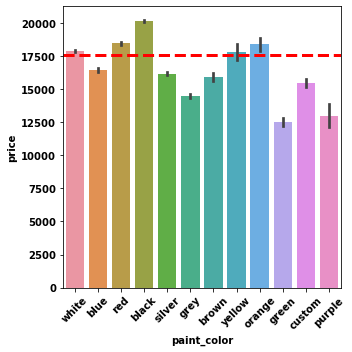

In [3044]:
plt.figure(figsize=(5,5))
fig=sns.barplot(x=df4['paint_color'],y=df4['price'],data=df4)
plt.axhline(df4.price.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xticks(rotation=45)
plt.tight_layout(h_pad=1)

In [3045]:
# grouping "paint_color" column values listed below into two categories 
#first category grouping all values above the mean price
# second category grouping the rest together

In [3046]:
paint_color_categories={'white':'paint_color_white_red_black_orange_yellow',
                        'blue':'paint_color_others',
                        'red':'paint_color_white_red_black_orange_yellow',
                        'black':'paint_color_white_red_black_orange_yellow',
                        'silver':'paint_color_others',                                             
                        'grey':'paint_color_others',
                        'brown':'paint_color_others',
                        'yellow':'paint_color_white_red_black_orange_yellow',
                        'orange':'paint_color_white_red_black_orange_yellow',
                         'green':'paint_color_others',
                        'custom':'paint_color_others',
                        'purple':'paint_color_others'
                       
                        }
df4['paint_color_category']=df4['paint_color'].map(paint_color_categories)

In [3047]:
# checking for null values

In [3048]:
df4.paint_color_category.isnull().sum()

0

In [3049]:
# checking if all values appear

In [3050]:
df4.paint_color_category.value_counts()

paint_color_white_red_black_orange_yellow    253891
paint_color_others                           104671
Name: paint_color_category, dtype: int64

## Creating a rough price index by city for comparable models
####  A list of top 500 cars that we sold were created for the same options like 6 cylinders, gas fuel automatic transmission etc and  the unit price calulated based on sales
#### THis unit price was normalized to come up with an index

In [3051]:
# checking if there is enough unit sales for the top selling features

In [3052]:

df4.query('cylinders=="6 cylinders" and fuel=="gas" and transmission=="automatic" and drive=="4wd" and type=="sedan"')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,car_age,car_age_bins,condition_category,cylinders_category,fuel_category,title_status_category,transmission_category,drive_category,type_category,paint_color_category
10,7316130053,auburn,4500,1992.0,jeep,cherokee,excellent,6 cylinders,gas,192000.0,...,30.0,care age >=30 & <100 years,condition_excellent_fair_likenew_salvage,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_automatic_manual,drive_rwd_4wd,type_others,paint_color_white_red_black_orange_yellow
126,7302108846,auburn,17590,2015.0,volvo,s60 t5 premier sedan 4d,good,6 cylinders,gas,63512.0,...,7.0,car age >=5 & <10 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_automatic_manual,drive_rwd_4wd,type_others,paint_color_others
129,7302000016,auburn,38590,2019.0,volvo,s60 t8 r-design sedan 4d,good,6 cylinders,gas,14054.0,...,3.0,car age less that 5 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_automatic_manual,drive_rwd_4wd,type_others,paint_color_white_red_black_orange_yellow
158,7316711193,birmingham,34995,2012.0,dodge,charger limousine,good,6 cylinders,gas,41000.0,...,10.0,car age >=10 & <20 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_automatic_manual,drive_rwd_4wd,type_others,paint_color_white_red_black_orange_yellow
160,7316702941,birmingham,3495,1999.0,ford,windstar,good,6 cylinders,gas,135448.0,...,23.0,car age >=20 & <30 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_automatic_manual,drive_rwd_4wd,type_others,paint_color_white_red_black_orange_yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358526,7302138344,wyoming,22999,2013.0,NaN,2013,good,6 cylinders,gas,120000.0,...,9.0,car age >=5 & <10 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_automatic_manual,drive_rwd_4wd,type_others,paint_color_white_red_black_orange_yellow
358527,7302129327,wyoming,21999,2017.0,NaN,2017,good,6 cylinders,gas,51000.0,...,5.0,car age >=5 & <10 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_automatic_manual,drive_rwd_4wd,type_others,paint_color_white_red_black_orange_yellow
358530,7302118268,wyoming,41999,2015.0,NaN,2015,good,6 cylinders,gas,126000.0,...,7.0,car age >=5 & <10 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_automatic_manual,drive_rwd_4wd,type_others,paint_color_white_red_black_orange_yellow
358537,7302104597,wyoming,4977,2005.0,nissan,altima,good,6 cylinders,gas,154917.0,...,17.0,car age >=10 & <20 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_automatic_manual,drive_rwd_4wd,type_others,paint_color_white_red_black_orange_yellow


In [3053]:
# finding to top 500 models sold

In [3054]:
dfx=df4.query('cylinders=="6 cylinders" and fuel=="gas" and transmission=="automatic" \
                  and drive=="4wd" and type=="sedan"').groupby(['model']).agg({'id':'count','price':'sum'}).\
                   sort_values(by='price',ascending=False).head(500)
dfx

,id,price
model,,
explorer,175,4401322
1500,180,3761861
e-class,148,3102482
s5 premium plus sedan 4d,77,3060030
f150 xlt 4wd,75,2944377
...,...,...
s7,4,161380
sonic,21,161017
q3,6,159955


In [3056]:
keys=dfx.index
keys

Index(['explorer', '1500', 'e-class', 's5 premium plus sedan 4d',
       'f150 xlt 4wd', 'c-class', 'a6', 'wrangler unlimited', 'f-150 xlt',
       '3 series 330i xdrive sedan',
       ...
       'equus', 'sportage', 'promaster 1500 cargo van', 'frontier crew cab',
       'escape s', 's7', 'sonic', 'q3', 'e250 van', 'edge sel suv'],
      dtype='object', name='model', length=500)

In [3057]:
dfy=df4.query('model in @keys and cylinders=="6 cylinders" and fuel=="gas" and transmission=="automatic" \
                  and drive=="4wd" and type=="sedan"')

In [3058]:
# grouping unit sales by region

In [3059]:
dfa=dfy.groupby(['region']).agg({'id': 'count', 'price':'sum'})
dfa

,id,price
region,,
SF bay area,89,1098056
abilene,7,137459
akron / canton,86,957263
albany,64,882209
albuquerque,86,1892900
...,...,...
york,17,186570
youngstown,20,260799
yuba-sutter,35,442818


In [3060]:
#checking for null values
dfa.isnull().sum()

id       0
price    0
dtype: int64

In [3061]:
dfa=dfa.reset_index()

In [3062]:
dfa['average'] = dfa['price']/dfa['id']
dfa

,region,id,price,average
0,SF bay area,89,1098056,12337.707865
1,abilene,7,137459,19637.000000
2,akron / canton,86,957263,11130.965116
3,albany,64,882209,13784.515625
4,albuquerque,86,1892900,22010.465116
...,...,...,...,...
386,york,17,186570,10974.705882
387,youngstown,20,260799,13039.950000
388,yuba-sutter,35,442818,12651.942857
389,yuma,11,109750,9977.272727


In [ ]:
#finding the mean price to normaize by

In [3074]:
Overall_average=dfa.price.sum()/dfa.id.sum()
Overall_average

15847.068443847984

In [3075]:
# genrating the region index

In [3076]:
dfa['region_index']=(dfa.average/Overall_average)*100
dfa

,region,id,price,average,region_index
0,SF bay area,89,1098056,12337.707865,77.854828
1,abilene,7,137459,19637.000000,123.915663
2,akron / canton,86,957263,11130.965116,70.239901
3,albany,64,882209,13784.515625,86.984641
4,albuquerque,86,1892900,22010.465116,138.892977
...,...,...,...,...,...
386,york,17,186570,10974.705882,69.253856
387,youngstown,20,260799,13039.950000,82.286197
388,yuba-sutter,35,442818,12651.942857,79.837750
389,yuma,11,109750,9977.272727,62.959738


In [3065]:
#dropping unwanted columns

In [3077]:
dfb=dfa.drop(['id','price','average'],axis='columns')

In [3068]:
#creating a new data frame

In [3092]:
dfc=pd.merge(left=df4,right=dfb,how='left',on='region')
dfc

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,car_age_bins,condition_category,cylinders_category,fuel_category,title_status_category,transmission_category,drive_category,type_category,paint_color_category,region_index
0,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,...,car age >=5 & <10 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_other,drive_rwd_4wd,type_pickup_truck_other_coupe_van_convertible,paint_color_white_red_black_orange_yellow,127.636646
1,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,...,car age >=10 & <20 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_other,drive_rwd_4wd,type_pickup_truck_other_coupe_van_convertible,paint_color_others,127.636646
2,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,...,car age less that 5 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_other,drive_rwd_4wd,type_pickup_truck_other_coupe_van_convertible,paint_color_white_red_black_orange_yellow,127.636646
3,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,...,car age >=5 & <10 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_other,drive_rwd_4wd,type_pickup_truck_other_coupe_van_convertible,paint_color_white_red_black_orange_yellow,127.636646
4,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,...,car age >=5 & <10 years,condition_excellent_fair_likenew_salvage,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_automatic_manual,drive_rwd_4wd,type_pickup_truck_other_coupe_van_convertible,paint_color_white_red_black_orange_yellow,127.636646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358557,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,...,car age less that 5 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_other,fwd,type_others,paint_color_white_red_black_orange_yellow,159.769778
358558,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.0,...,car age less that 5 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_other,fwd,type_others,paint_color_white_red_black_orange_yellow,159.769778
358559,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.0,...,car age less that 5 years,condition_good_new,cylinders_6_8_10_12,fuel_other_diesel_electric,title_status_clean_lien,transmission_other,drive_rwd_4wd,type_others,paint_color_white_red_black_orange_yellow,159.769778
358560,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,...,car age less that 5 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_other,fwd,type_others,paint_color_others,159.769778


In [3070]:
# a plot of regional variation by state

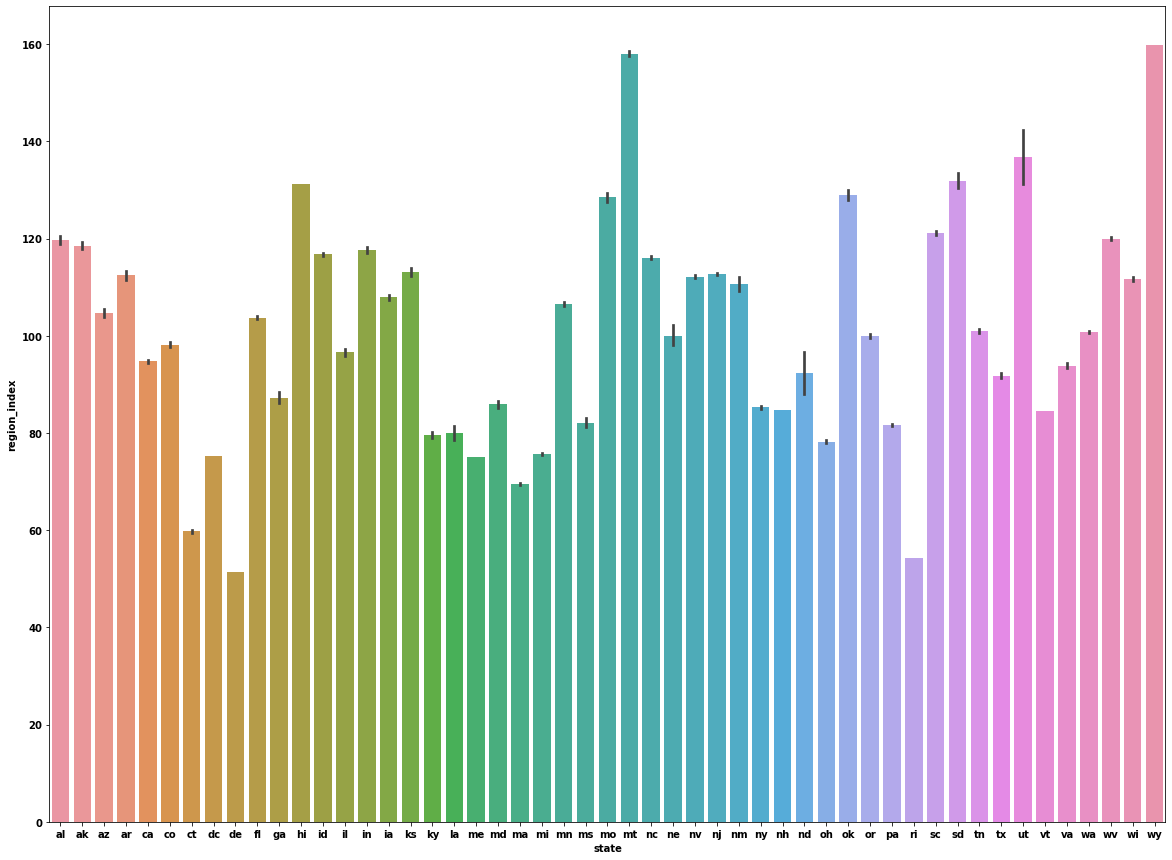

In [3093]:
plt.figure(figsize=(20,15))
sns.barplot(x='state',y='region_index',data=dfc);

In [3081]:
#checking for null values

In [3094]:
dfc.isna().sum()

id                            0
region                        0
price                         0
year                          0
manufacturer              10836
model                      2915
condition                     0
cylinders                     0
fuel                          0
odometer                      0
title_status                  0
transmission                  0
VIN                      133097
drive                         0
size                     258818
type                          0
paint_color                   0
state                         0
price_bins                    0
odometer_bins                 0
current_Year                  0
car_age                       0
car_age_bins                  0
condition_category            0
cylinders_category            0
fuel_category                 0
title_status_category         0
transmission_category         0
drive_category                0
type_category                 0
paint_color_category          0
region_i

In [3083]:
# dropping nulls from region index

In [3095]:

dfc.dropna(subset=['region_index'],inplace=True)

# Taking log transformation of price column
# This was part of an iterration after the first model predicted negative price   values


In [3096]:
dfc['price_log']=np.log10(dfc['price'])

#### The log transfromation makes the median price close to mean (4.17 vs 4.09)
#### Median of 4.17 will be used to estimate the impact of coefficients are log linear regression

In [3097]:
dfc.price_log.describe()

count    357709.000000
mean          4.098375
std           0.425691
min           2.004321
25%           3.869232
50%           4.175946
75%           4.424718
max           4.698961
Name: price_log, dtype: float64

In [3087]:
# chcking for null values once more

In [3098]:
dfc.isnull().sum()

id                            0
region                        0
price                         0
year                          0
manufacturer              10804
model                      2910
condition                     0
cylinders                     0
fuel                          0
odometer                      0
title_status                  0
transmission                  0
VIN                      132870
drive                         0
size                     258122
type                          0
paint_color                   0
state                         0
price_bins                    0
odometer_bins                 0
current_Year                  0
car_age                       0
car_age_bins                  0
condition_category            0
cylinders_category            0
fuel_category                 0
title_status_category         0
transmission_category         0
drive_category                0
type_category                 0
paint_color_category          0
region_i

In [3099]:
# preserving a copy for use with Sklearn  later
dfz=dfc.copy(deep=True)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Creating linear regression model with OLS --Part 1

In [ ]:
#scaling the data

In [3100]:
cols_to_scale =['car_age','odometer']

In [ ]:
#create and fit scaler

In [3101]:
scaler=StandardScaler()
scaler.fit(dfc[cols_to_scale])
dfc[cols_to_scale]=scaler.transform(dfc[cols_to_scale])

In [ ]:
#dropping columns not needed for regression

In [3102]:
df5= dfc.drop([ 'id', 'region','manufacturer', 'model', 'condition','cylinders', 'fuel',\
              'title_status', 'drive','transmission', 'VIN','size', 'type','paint_color',
               'state','current_Year','year','price_bins', 'car_age_bins','odometer_bins',
                    ],axis=1)

In [3103]:
df5.columns

Index(['price', 'odometer', 'car_age', 'condition_category',
       'cylinders_category', 'fuel_category', 'title_status_category',
       'transmission_category', 'drive_category', 'type_category',
       'paint_color_category', 'region_index', 'price_log'],
      dtype='object')

In [3104]:
# doing the one hot encoding of categrical variables

In [3105]:
df6 = pd.get_dummies(df5,columns=[ 'condition_category','cylinders_category','fuel_category',\
                                  'title_status_category', 'transmission_category','drive_category',
                                  'type_category', 'paint_color_category'])

In [3106]:
#final check for null values

In [3107]:
df6.isnull().sum()

price                                                                   0
odometer                                                                0
car_age                                                                 0
region_index                                                            0
price_log                                                               0
condition_category_condition_excellent_fair_likenew_salvage             0
condition_category_condition_good_new                                   0
cylinders_category_cylinders_4_5_other_3                                0
cylinders_category_cylinders_6_8_10_12                                  0
fuel_category_fuel_gas_hybrid                                           0
fuel_category_fuel_other_diesel_electric                                0
title_status_category_title_status_clean_lien                           0
title_status_category_title_status_rebuilt_salvage_missing_partsonly    0
transmission_category_transmission_aut

In [3108]:
## checking for multi collinearity among columns

In [3109]:
# getting list of all columns

In [3110]:

df6.columns

Index(['price', 'odometer', 'car_age', 'region_index', 'price_log',
       'condition_category_condition_excellent_fair_likenew_salvage',
       'condition_category_condition_good_new',
       'cylinders_category_cylinders_4_5_other_3',
       'cylinders_category_cylinders_6_8_10_12',
       'fuel_category_fuel_gas_hybrid',
       'fuel_category_fuel_other_diesel_electric',
       'title_status_category_title_status_clean_lien',
       'title_status_category_title_status_rebuilt_salvage_missing_partsonly',
       'transmission_category_transmission_automatic_manual',
       'transmission_category_transmission_other',
       'drive_category_drive_rwd_4wd', 'drive_category_fwd',
       'type_category_type_others',
       'type_category_type_pickup_truck_other_coupe_van_convertible',
       'paint_color_category_paint_color_others',
       'paint_color_category_paint_color_white_red_black_orange_yellow'],
      dtype='object')

In [3111]:
X = df6[['price', 'odometer', 'car_age', 'region_index',
       'condition_category_condition_excellent_fair_likenew_salvage',
       'condition_category_condition_good_new',
       'cylinders_category_cylinders_4_5_other_3',
       'cylinders_category_cylinders_6_8_10_12',
       'fuel_category_fuel_gas_hybrid',
       'fuel_category_fuel_other_diesel_electric',
       'title_status_category_title_status_clean_lien',
       'title_status_category_title_status_rebuilt_salvage_missing_partsonly',
       'transmission_category_transmission_automatic_manual',
       'transmission_category_transmission_other',
       'drive_category_drive_rwd_4wd', 'drive_category_fwd',
       'type_category_type_others',
       'type_category_type_pickup_truck_other_coupe_van_convertible',
       'paint_color_category_paint_color_others',
       'paint_color_category_paint_color_white_red_black_orange_yellow'
                
       ]]

In [3112]:
# checking for multicollinearity

In [3113]:
# the independent variables set

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                                              feature       VIF
0                                               price  2.620603
1                                            odometer  2.043505
2                                             car_age  2.214801
3                                        region_index  1.024761
4   condition_category_condition_excellent_fair_li...       inf
5               condition_category_condition_good_new       inf
6            cylinders_category_cylinders_4_5_other_3       inf
7              cylinders_category_cylinders_6_8_10_12       inf
8                       fuel_category_fuel_gas_hybrid       inf
9            fuel_category_fuel_other_diesel_electric       inf
10      title_status_category_title_status_clean_lien       inf
11  title_status_category_title_status_rebuilt_sal...       inf
12  transmission_category_transmission_automatic_m...       inf
13           transmission_category_transmission_other       inf
14                       drive_category_

In [3114]:
#### Above indicated severe multicollinearity with sevral inf values

In [3115]:
##iterating and removing with VIF more than 10¶

In [3116]:
X12 = df6[['car_age','odometer','region_index',
         'fuel_category_fuel_other_diesel_electric',
       'condition_category_condition_excellent_fair_likenew_salvage',
        'cylinders_category_cylinders_6_8_10_12',
        'title_status_category_title_status_rebuilt_salvage_missing_partsonly',
        'transmission_category_transmission_other', 'drive_category_drive_rwd_4wd',
           'type_category_type_pickup_truck_other_coupe_van_convertible',
         'paint_color_category_paint_color_white_red_black_orange_yellow']]

In [3117]:
#cehcking for multicollinearity again

In [3118]:
# the independent variables set
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X12.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X12.values, i)
                          for i in range(len(X12.columns))]
print(vif_data)

                                              feature       VIF
0                                             car_age  1.760935
1                                            odometer  1.879203
2                                        region_index  4.854445
3            fuel_category_fuel_other_diesel_electric  1.276736
4   condition_category_condition_excellent_fair_li...  1.487511
5              cylinders_category_cylinders_6_8_10_12  4.773085
6   title_status_category_title_status_rebuilt_sal...  1.039577
7            transmission_category_transmission_other  1.730246
8                        drive_category_drive_rwd_4wd  3.983346
9   type_category_type_pickup_truck_other_coupe_va...  1.740859
10  paint_color_category_paint_color_white_red_bla...  3.158079


In [3119]:
## Above columns all have a value of VIF and hence are good to go to next stage

In [3120]:
# Considering only columns after taking care of multicollinearity

In [3148]:
X2 = X12
y2 =df6['price']

In [3122]:
# Running the OLS model
#### this model was run wihtout the train test split to get a preliminary understanding of the coefficents

In [3149]:
modstandard1 = sm.OLS(y2,X2)
results=modstandard1.fit()
results.tvalues
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                          2.221e+05
Date:                Thu, 25 Aug 2022   Prob (F-statistic):                        0.00
Time:                        00:26:54   Log-Likelihood:                     -3.7059e+06
No. Observations:              357709   AIC:                                  7.412e+06
Df Residuals:                  357698   BIC:                                  7.412e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
car_age                                                              -5008.5671     16.949   -295.501      0.000   -5041.787   -4975.347
odometer                                                             -2890.6503     17.509   -165.092      0.000   -2924.968   -2856.333
region_index                                                            66.2621      0.274    242.227      0.000      65.726      66.798
fuel_category_fuel_other_diesel_electric                              5130.2554     39.969    128.357      0.000    5051.918    5208.593
condition_category_condition_excellent_fair_likenew_salvage            621.7504     28.057     22.160      0.000     566.760     676.741
cylinders_category_cylinders_6_8_10_12                                5054.2691     32.617    154.959      0.000    4990.341    5118.197
title_status_category_title_status_rebuilt_salvage_missing_partsonly -3506.2742     75.053    -46.717      0.000   -3653.376   -3359.173
transmission_category_transmission_other                               819.3601     41.268     19.854      0.000     738.475     900.245
drive_category_drive_rwd_4wd                                          5477.8899     30.763    178.067      0.000    5417.595    5538.185
type_category_type_pickup_truck_other_coupe_van_convertible           5046.9425     29.155    173.110      0.000    4989.800    5104.085
paint_color_category_paint_color_white_red_black_orange_yellow         987.3741     26.974     36.605      0.000     934.506    1040.242
==============================================================================
Omnibus:                    16575.836   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57072.464
Skew:                          -0.095   Prob(JB):                         0.00
Kurtosis:                       4.948   Cond. No.                         605.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3124]:
### The median error is shown below

In [3151]:
mae = median_absolute_error(y2, results.fittedvalues)
string_score = f"MAE on training set: {mae:.2f} $s/car"


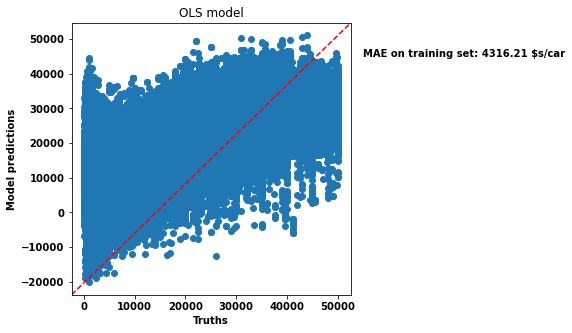

In [3152]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y2, results.fittedvalues)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(55000, 45000, string_score)
plt.title("OLS model")
plt.ylabel("Model predictions")
plt.xlabel("Truths");


### From the above we can see that the OLS model we can see the following:
#### the coefficeints it predicted are statically valid (p<0.05)
#### The model how ever is predicting negative price
#### hence there is a need to use log transformation of price for regression 
#### to make sure predicted prices are always positive


## Creating linear regression model with OLS --Part 2

In [3128]:
# Starting over again

In [3129]:
#dropping columns not needed for regression

In [3162]:
df5log= dfc.drop([ 'id', 'region','manufacturer', 'model', 'condition','cylinders', 'fuel',\
              'title_status', 'drive','transmission', 'VIN','size', 'type','paint_color',
               'state','current_Year','year','price_bins', 'car_age_bins','odometer_bins'],axis=1)

In [ ]:
# getting the dummy variables

In [3163]:
df6log = pd.get_dummies(df5log,columns=[ 'condition_category','cylinders_category','fuel_category',\
                                  'title_status_category', 'transmission_category','drive_category',
                                  'type_category', 'paint_color_category'])

In [3132]:
# selecting columns like before to avoid multicollinearity

In [3164]:
X12log = df6log[['car_age','odometer','region_index',
         'fuel_category_fuel_other_diesel_electric',
       'condition_category_condition_excellent_fair_likenew_salvage',
        'cylinders_category_cylinders_6_8_10_12',
        'title_status_category_title_status_rebuilt_salvage_missing_partsonly',
        'transmission_category_transmission_other', 'drive_category_drive_rwd_4wd',
           'type_category_type_pickup_truck_other_coupe_van_convertible',
         'paint_color_category_paint_color_white_red_black_orange_yellow']]

In [3134]:
# Considering only columns after taking care of multicollinearity

In [3165]:
X3log = X12log
y3log =df6log['price_log']

In [3136]:
## Running the OLS model

In [3176]:
modstandardlog = sm.OLS(y3log,X3log)
resultslog=modstandardlog.fit()
resultslog.tvalues
resultslog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                          5.731e+05
Date:                Thu, 25 Aug 2022   Prob (F-statistic):                        0.00
Time:                        00:41:04   Log-Likelihood:                     -4.9100e+05
No. Observations:              357709   AIC:                                  9.820e+05
Df Residuals:                  357698   BIC:                                  9.821e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
car_age                                                                 -0.1479      0.002    -69.801      0.000      -0.152      -0.144
odometer                                                                -0.0140      0.002     -6.414      0.000      -0.018      -0.010
region_index                                                             0.0235   3.42e-05    687.770      0.000       0.023       0.024
fuel_category_fuel_other_diesel_electric                                 0.1197      0.005     23.968      0.000       0.110       0.130
condition_category_condition_excellent_fair_likenew_salvage              0.5849      0.004    166.793      0.000       0.578       0.592
cylinders_category_cylinders_6_8_10_12                                   0.6714      0.004    164.690      0.000       0.663       0.679
title_status_category_title_status_rebuilt_salvage_missing_partsonly     0.2205      0.009     23.509      0.000       0.202       0.239
transmission_category_transmission_other                                 0.3451      0.005     66.914      0.000       0.335       0.355
drive_category_drive_rwd_4wd                                             0.4822      0.004    125.407      0.000       0.475       0.490
type_category_type_pickup_truck_other_coupe_van_convertible              0.1400      0.004     38.414      0.000       0.133       0.147
paint_color_category_paint_color_white_red_black_orange_yellow           0.6276      0.003    186.158      0.000       0.621       0.634
==============================================================================
Omnibus:                     6223.942   Durbin-Watson:                   0.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7202.950
Skew:                          -0.277   Prob(JB):                         0.00
Kurtosis:                       3.420   Cond. No.                         605.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2427]:
# R2 for test data
#predicted_y1 = resultslog.predict(X_test1)
#print("R2 :", r2_score(y_test1, predicted_y1))
#print("r^2:", sps.pearsonr(y_test1, predicted_y1)[0]**2)

In [3138]:
# The error for the model is given below

In [3189]:
mae = median_absolute_error(y3log, resultslog.predict(X3log))
string_score =f"MAE on training set:10^ {mae:.2f} $s/car"

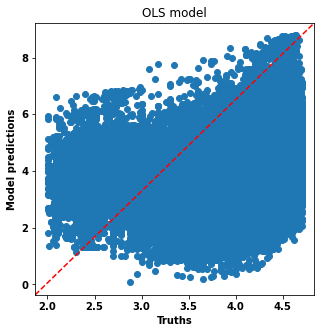

In [3190]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y3log, resultslog.predict(X3log))
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.title("OLS model")
plt.ylabel("Model predictions")
plt.xlabel("Truths");

## Above evaluation metric: Median absolute error was chosen due to 
### a) for log transformations median makes sense
### b) MAD is resistant to outliers.


### interpretation of coefficients

## Comments specific to model above

#### - From the above OLS model we can see that all the coefficients are statistically significant (p<0.05)
#### - Increase in car age and odometer mileage  have a negative impact  on the median of car price



## Regression  Using Sklearn Models

##### Getting the earlier processed data frame

In [3191]:
dfc1=pd.merge(left=df4,right=dfb,how='left',on='region')
dfc1

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,car_age_bins,condition_category,cylinders_category,fuel_category,title_status_category,transmission_category,drive_category,type_category,paint_color_category,region_index
0,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,...,car age >=5 & <10 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_other,drive_rwd_4wd,type_pickup_truck_other_coupe_van_convertible,paint_color_white_red_black_orange_yellow,127.636646
1,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,...,car age >=10 & <20 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_other,drive_rwd_4wd,type_pickup_truck_other_coupe_van_convertible,paint_color_others,127.636646
2,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,...,car age less that 5 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_other,drive_rwd_4wd,type_pickup_truck_other_coupe_van_convertible,paint_color_white_red_black_orange_yellow,127.636646
3,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,...,car age >=5 & <10 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_other,drive_rwd_4wd,type_pickup_truck_other_coupe_van_convertible,paint_color_white_red_black_orange_yellow,127.636646
4,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,...,car age >=5 & <10 years,condition_excellent_fair_likenew_salvage,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_automatic_manual,drive_rwd_4wd,type_pickup_truck_other_coupe_van_convertible,paint_color_white_red_black_orange_yellow,127.636646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358557,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,...,car age less that 5 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_other,fwd,type_others,paint_color_white_red_black_orange_yellow,159.769778
358558,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.0,...,car age less that 5 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_other,fwd,type_others,paint_color_white_red_black_orange_yellow,159.769778
358559,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.0,...,car age less that 5 years,condition_good_new,cylinders_6_8_10_12,fuel_other_diesel_electric,title_status_clean_lien,transmission_other,drive_rwd_4wd,type_others,paint_color_white_red_black_orange_yellow,159.769778
358560,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,...,car age less that 5 years,condition_good_new,cylinders_6_8_10_12,fuel_gas_hybrid,title_status_clean_lien,transmission_other,fwd,type_others,paint_color_others,159.769778


In [3192]:
dfc1.dropna(subset=['region_index'],inplace=True)

In [3193]:
# log transforming the target column

In [3194]:

dfc1['price_log']=np.log10(dfc1['price'])

In [3195]:
# Checking for null values

In [3196]:
dfc1.isnull().sum()

id                            0
region                        0
price                         0
year                          0
manufacturer              10804
model                      2910
condition                     0
cylinders                     0
fuel                          0
odometer                      0
title_status                  0
transmission                  0
VIN                      132870
drive                         0
size                     258122
type                          0
paint_color                   0
state                         0
price_bins                    0
odometer_bins                 0
current_Year                  0
car_age                       0
car_age_bins                  0
condition_category            0
cylinders_category            0
fuel_category                 0
title_status_category         0
transmission_category         0
drive_category                0
type_category                 0
paint_color_category          0
region_i

In [3197]:
#dropping columns not needed for regression

In [3198]:
df4sk= dfc1.drop([ 'id', 'region','manufacturer', 'model', 'condition','cylinders', 'fuel',\
              'title_status', 'drive','transmission', 'VIN','size', 'type','paint_color',
               'state','current_Year','year','price_bins', 'car_age_bins','odometer_bins',
               #'car_age_log','odometer_log','region_index_log'
               ],axis=1)

In [3199]:
# checking the remaining columns

In [3200]:
df4sk.columns

Index(['price', 'odometer', 'car_age', 'condition_category',
       'cylinders_category', 'fuel_category', 'title_status_category',
       'transmission_category', 'drive_category', 'type_category',
       'paint_color_category', 'region_index', 'price_log'],
      dtype='object')

In [3201]:
XSK = df4sk.drop(['price','price_log'],axis='columns')
ySK = df4sk['price']

## splitting the data into train and test 

In [3202]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(XSK,ySK, test_size=0.3,random_state=42)

In [ ]:
# setting up a preprocessor

In [3203]:
categorical_columns = ["condition_category","cylinders_category","fuel_category",
                       "title_status_category","transmission_category","drive_category","type_category",
                       "paint_color_category"]
numerical_columns = ["car_age", "odometer","region_index"]

preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,  
)

## Model: Ridge regressionwith OHC ,small regularization and no Scaling to model the   logarithm of the car Price

In [3204]:
modelSK = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1),
         func=np.log10, inverse_func=sp.special.exp10
    ),
)

In [3205]:
# fitting the model

In [3206]:
modelSK.fit(X_train1, y_train1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['condition_category',
                                                   'cylinders_category',
                                                   'fuel_category',
                                                   'title_status_category',
                                                   'transmission_category',
                                                   'drive_category',
                                                   'type_category',
                                                   'paint_color_category'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufun

## check the performance of the computed model 

In [3207]:
# R2 for train data
predicted_ysktrain = modelSK.predict(X_train1)
print("R2 :", r2_score(y_train1, predicted_ysktrain))
print("pearsons r^2:", sps.pearsonr(y_train1, predicted_ysktrain)[0]**2)

R2 : 0.546607409665483
pearsons r^2: 0.5837209748565344


In [3208]:
# R2 for test data
predicted_ysktest = modelSK.predict(X_test1)
print("R2 :", r2_score(y_test1, predicted_ysktest))
print("pearsons r^2:", sps.pearsonr(y_test1, predicted_ysktest)[0]**2)

R2 : 0.548650038586757
pearsons r^2: 0.5851763470623724


In [3209]:
## using median absolute error

In [3210]:

y_pred = modelSK.predict(X_train1)

mae = median_absolute_error(y_train1, predicted_ysktrain)
string_score = f"MAE on training set: {mae:.2f} $s/car"
y_pred = modelSK.predict(X_test1)
mae = median_absolute_error(y_test1, predicted_ysktest)
string_score += f"\nMAE on testing set: {mae:.2f} $s/car"

## plotting its predictions on the test set 

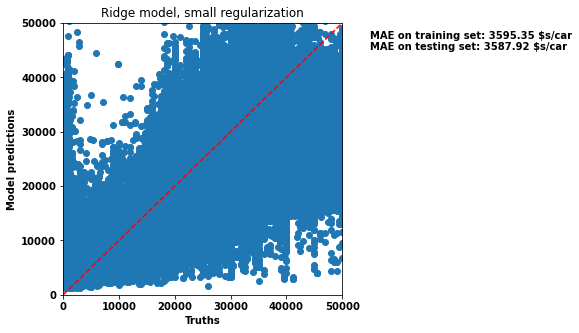

In [3211]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test1, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(55000, 45000, string_score)
plt.title("Ridge model, small regularization")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 50000])
_ = plt.ylim([0,50000])
#plt.legend(string_score, loc='center left',  bbox_to_anchor=(2.0, 0.5), fontsize=12)

In [3212]:
## The model above not good model that makes accurate predictions as can be see from above
##  where good predictions should lie on the red line.

## Interpreting coefficients

In [3213]:
feature_names = modelSK[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    modelSK[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
condition_category_condition_good_new,-0.016896
cylinders_category_cylinders_6_8_10_12,0.124391
fuel_category_fuel_other_diesel_electric,0.131524
title_status_category_title_status_rebuilt_salvage_missing_partsonly,-0.123412
transmission_category_transmission_other,0.031730
drive_category_fwd,-0.124667
type_category_type_pickup_truck_other_coupe_van_convertible,0.145433
paint_color_category_paint_color_white_red_black_orange_yellow,-0.023099
odometer,-0.000001
car_age,-0.029515


## General comments ( this was mentioned with OLS model as well and applies here as well)
### As we are mainly interested in understanding the relationships between the variables, R-squared values does ### not negate the importance of any significant variables.
### Even with a low R-squared with statistically significant P-values will identify relationships and coefficients will have the same interpretation. 
### Generally there is no additional cause to discount these findings.

### Comments specific to Skleran model above

#### -Due to the log transformation it means that  Median price(Y/X1) ) is associated with a 100 × (10^𝛽1 − 1)  percent changewith a one-unit increase in X1. Here 𝛽1 is the coefficient of X1.
#### -The car age coefficient is expressed in “dollars/car per year of car age”. 
#### -odometer is expressed in “dollars/car per mile in odometer”. 
#### -region_index in “dollars/car per unit in region index”
#### - All the one hot encoded categoires/options represent the increase or reduction factor in price when present.

#### From above Sklearn model we can see that increase in car age and odometer mileage will have a negative impact
####     On the median of car price.
#### - An an example increase in a year will decrease median car price by (1-10^(-.0.29)) or around 6-7% reduce in median price for an #### increase in year
####    
#### -the options given by the one hot encoding will all have an  impact to the median price of the 
#### -car when they are present according to the following:

#### Negative
#### condition_category_condition_good_new
#### paint_color_category_paint_color_white_red_black_orange_yellow
#### car_age( not OHC - variable)
#### title_status_category_title_status_rebuilt_salvage_missing_partsonly
#### drive_category_fwd
#### odometer ( not OHC - variable)

#### Positive:
#### type_category_type_pickup_truck_other_coupe_van_convertible
#### fuel_category_fuel_other_diesel_electric
#### cylinders_category_cylinders_6_8_10_12
#### transmission_category_transmission_other
#### region_index ( not OHC - variable)



In [ ]:
## the coefficient below are unscaled so may change after scaling

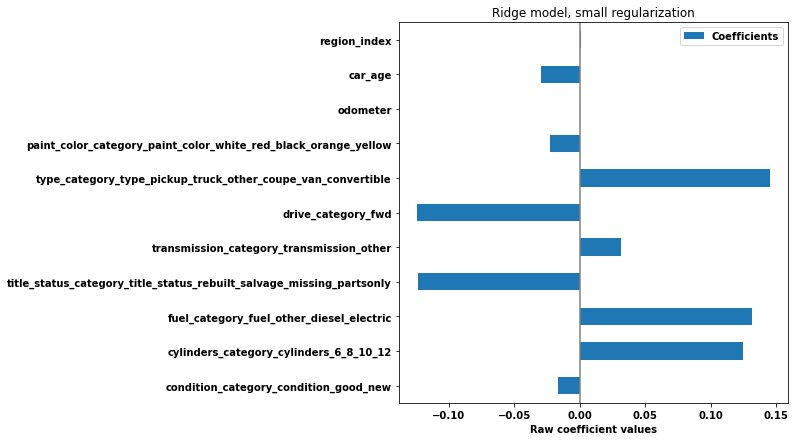

In [3215]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [3218]:
## given below is plot of the features with their std dec. It shows region_index,car age and odometer as having high st dev
## I scaled the X-axis  to make sure all labels are visibel hence the top ones are cutting out

''

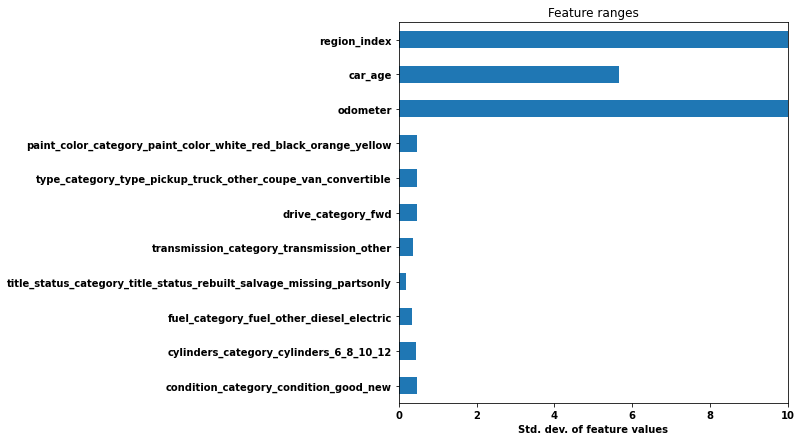

In [3219]:
X_train_preprocessed = pd.DataFrame(
    modelSK[:-1].transform(X_train1), columns=feature_names
)

X_train_preprocessed.std(axis=0).plot.barh(figsize=(9, 7))
plt.title("Feature ranges")
plt.xlabel("Std. dev. of feature values")
plt.subplots_adjust(left=0.3)
plt.xlim([0,10])
;

## The coefficients after normalzing is given below. 

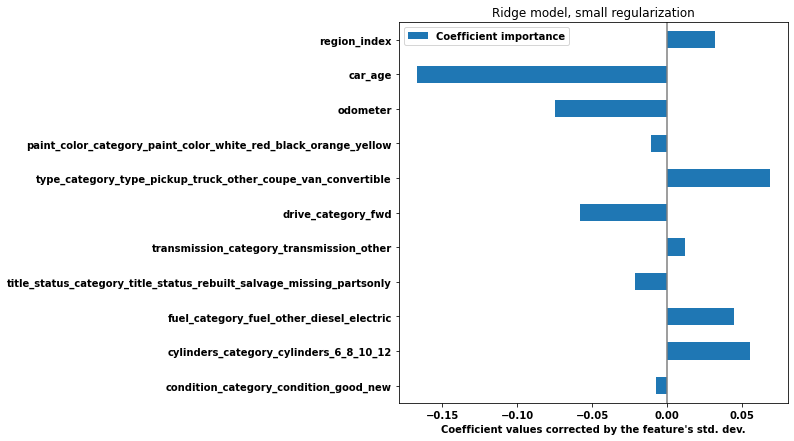

In [3220]:
coefs = pd.DataFrame(
    modelSK[-1].regressor_.coef_ * X_train_preprocessed.std(axis=0),
    columns=["Coefficient importance"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.xlabel("Coefficient values corrected by the feature's std. dev.")
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)


## Checking the variability of the coefficients through cross validation

In [3221]:
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model = cross_validate(
    modelSK,
    XSK,
    ySK,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)

coefs = pd.DataFrame(
    [
        est[-1].regressor_.coef_ * est[:-1].transform(XSK.iloc[train_idx]).std(axis=0)
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(XSK, ySK))
    ],
    columns=feature_names,
)

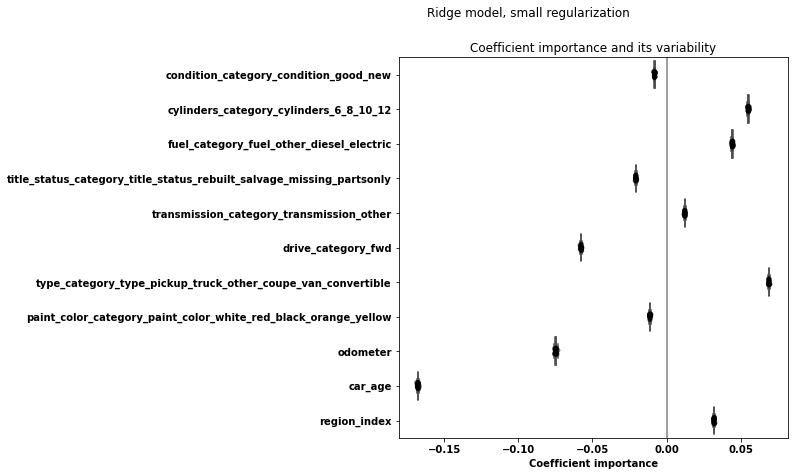

In [3222]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.suptitle("Ridge model, small regularization")
plt.subplots_adjust(left=0.3)

#### coefficients above look pretty stable to data pertubation

## Ridge regressionwith OHC ,small regularization and Scaling to model the logarithm of the car Price

In [3223]:
# Adding scaler to the preprocessor and creating another model similar to the first one
## all similar steps will be followed

In [3224]:
preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    (StandardScaler(), numerical_columns),
)

In [3225]:
model2 = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10
   ),
)
model2.fit(X_train1, y_train1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['condition_category',
                                                   'cylinders_category',
                                                   'fuel_category',
                                                   'title_status_category',
                                                   'transmission_category',
                                                   'drive_category',
                                                   'type_category',
                                                   'paint_color_category']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['car_age', 'odometer',
                      

In [3226]:
# chekcing Error

In [3227]:
predicted_ysktrain1 = model2.predict(X_train1)

mae = median_absolute_error(y_train1, predicted_ysktrain1)
string_score = f"MAE on training set: {mae:.2f} $s/car"
predicted_yskest1 = model2.predict(X_test1)
mae = median_absolute_error(y_test1, predicted_yskest1)
string_score += f"\nMAE on testing set: {mae:.2f} $s/car"

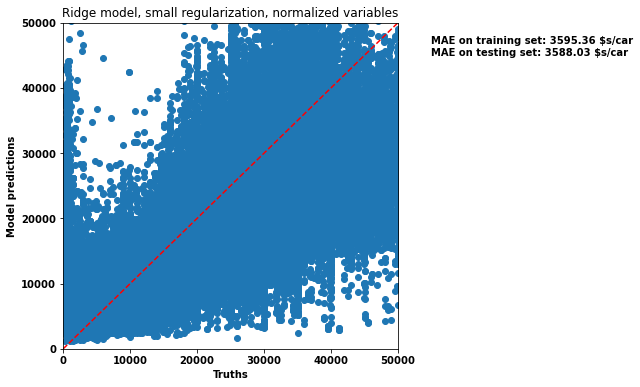

In [3228]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test1, predicted_yskest1)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(55000, 45000, string_score)

plt.title("Ridge model, small regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 50000])
_ = plt.ylim([0, 50000])



In [3229]:
## coefficients below have already been scaled for interpretation

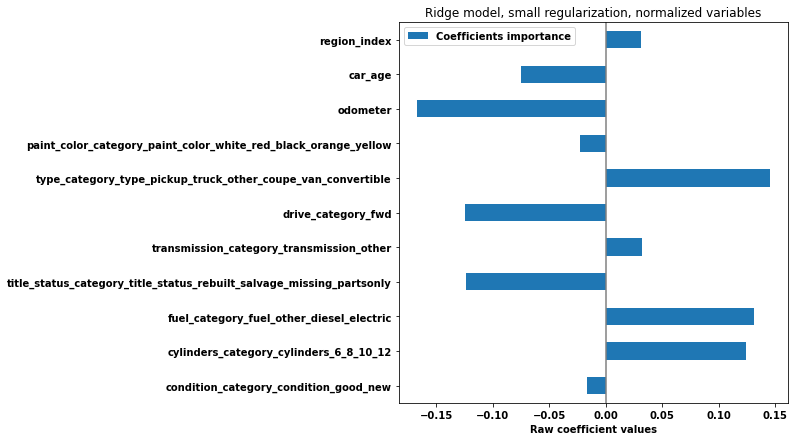

In [3230]:
coefs = pd.DataFrame(
    model2[-1].regressor_.coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization, normalized variables")
plt.xlabel("Raw coefficient values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)



In [3231]:
feature_names = model2[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    modelSK[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
onehotencoder__condition_category_condition_good_new,-0.016896
onehotencoder__cylinders_category_cylinders_6_8_10_12,0.124391
onehotencoder__fuel_category_fuel_other_diesel_electric,0.131524
onehotencoder__title_status_category_title_status_rebuilt_salvage_missing_partsonly,-0.123412
onehotencoder__transmission_category_transmission_other,0.031730
onehotencoder__drive_category_fwd,-0.124667
onehotencoder__type_category_type_pickup_truck_other_coupe_van_convertible,0.145433
onehotencoder__paint_color_category_paint_color_white_red_black_orange_yellow,-0.023099
standardscaler__car_age,-0.000001
standardscaler__odometer,-0.029515


In [3263]:
## this gives the same coefficients as before but due to scaling now odometer is more important than car age and there is a 
## change in numerical value of all numerical coefficient

In [3233]:
cv_model = cross_validate(
    model2,
    XSK,
    ySK,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].regressor_.coef_ for est in cv_model["estimator"]], columns=feature_names
)

In [2472]:
#coefs.describe()

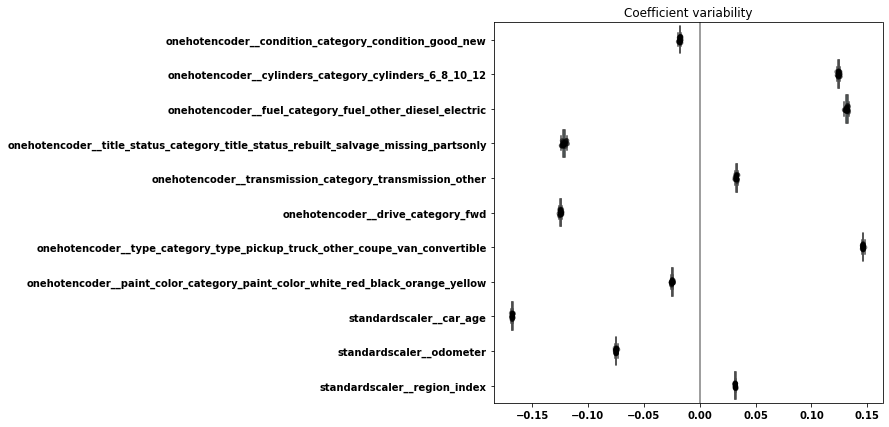

In [3234]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)


### The results stability to data pertubation

## Ridge regressionwith OHC ,Scaling and regularization after CV to model the logarithm of the car Price

In [3235]:
#running a search for optimal alpa

In [3236]:
alphas = np.logspace(-10, 10, 21)  # alpha values to be chosen from by cross-validation
model3 = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=RidgeCV(alphas=alphas),
        func=np.log10,
        inverse_func=sp.special.exp10,
    ),
)
model3.fit(X_train1, y_train1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['condition_category',
                                                   'cylinders_category',
                                                   'fuel_category',
                                                   'title_status_category',
                                                   'transmission_category',
                                                   'drive_category',
                                                   'type_category',
                                                   'paint_color_category']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['car_age', 'odometer',
                      

### Checking which value of Alpha that has been selected.

In [3237]:

model3[-1].regressor_.alpha_

10.0

In [3238]:
#Checking the  errors with the selected alphas


In [3239]:
predicted_ysktrain3= model3.predict(X_train1)
mae = median_absolute_error(y_train1,predicted_ysktrain3)
string_score = f"MAE on training set: {mae:.2f} $/car"
predicted_yskest3 = model3.predict(X_test1)
mae = median_absolute_error(y_test1,predicted_yskest3)
string_score += f"\nMAE on testing set: {mae:.2f} $/car"

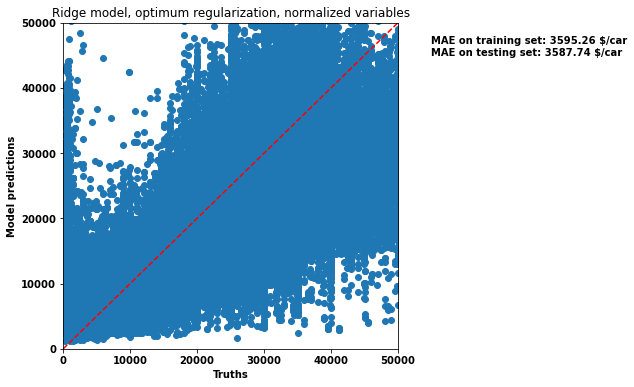

In [3240]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, predicted_yskest3)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(55000, 45000, string_score)

plt.title("Ridge model, optimum regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 50000])
_ = plt.ylim([0, 50000])

In [3241]:
## models error did not change for all the 3 models so far and remained around 3588$/car in MAE terms

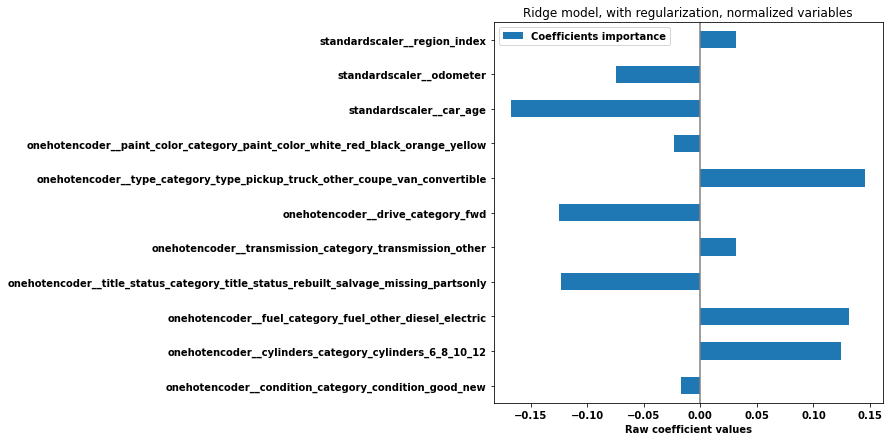

In [2829]:
coefs = pd.DataFrame(
    model3[-1].regressor_.coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, with regularization, normalized variables")
plt.xlabel("Raw coefficient values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [2830]:
feature_names = model3[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    modelSK[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
onehotencoder__condition_category_condition_good_new,-0.016896
onehotencoder__cylinders_category_cylinders_6_8_10_12,0.124391
onehotencoder__fuel_category_fuel_other_diesel_electric,0.131524
onehotencoder__title_status_category_title_status_rebuilt_salvage_missing_partsonly,-0.123412
onehotencoder__transmission_category_transmission_other,0.031730
onehotencoder__drive_category_fwd,-0.124667
onehotencoder__type_category_type_pickup_truck_other_coupe_van_convertible,0.145433
onehotencoder__paint_color_category_paint_color_white_red_black_orange_yellow,-0.023099
standardscaler__car_age,-0.000001
standardscaler__odometer,-0.029515


## Regularization coefficients are same as the one with low alpha and scaling(i.e. previous model)

## Lasso regression with OHC,Scaling and regularization after cross validation to model the logarithm of the Car Price

In [3242]:
# Setting up the model

In [3244]:
alphas = np.logspace(-10, 10, 21)  # alpha values to be chosen from by cross-validation
model4 = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=LassoCV(alphas=alphas, max_iter=100_000),
        func=np.log10,
        inverse_func=sp.special.exp10,
    ),
)

_ = model4.fit(X_train1, y_train1)

In [3245]:
model4[-1].regressor_.alpha_

1e-07

In [3247]:
# chekcing error

In [3248]:
predicted_ysktrain4 = model4.predict(X_train1)
mae = median_absolute_error(y_train1, predicted_ysktrain4)
string_score = f"MAE on training set: {mae:.2f} $s/car"
predicted_ysktrain4 = model4.predict(X_test1)
mae = median_absolute_error(y_test1,predicted_ysktrain4)
string_score += f"\nMAE on testing set: {mae:.2f} $s/car"

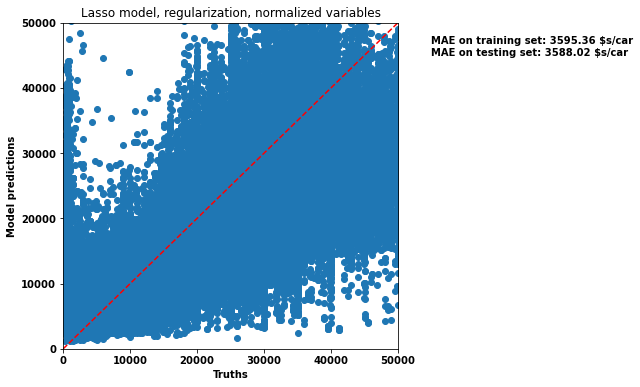

In [3249]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, predicted_ysktrain4)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(55000, 45000, string_score)

plt.title("Lasso model, regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 50000])
_ = plt.ylim([0, 50000])

In [3250]:
# Checking if Lasson dropped any coefficients

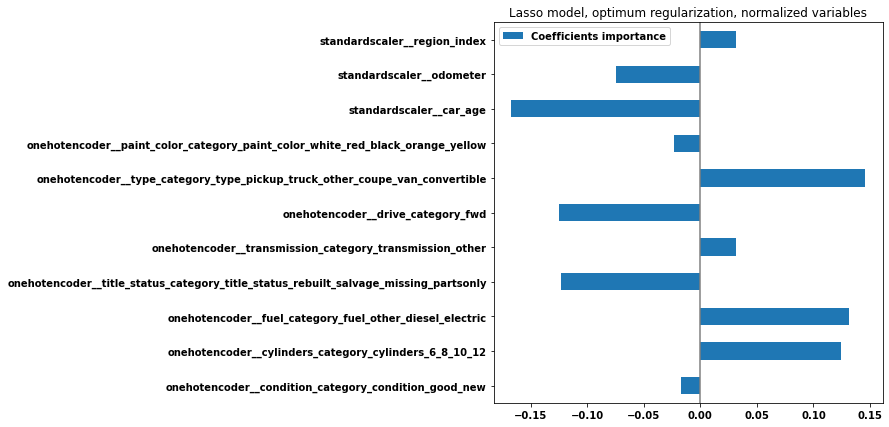

In [3251]:
coefs = pd.DataFrame(
    model4[-1].regressor_.coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Lasso model, optimum regularization, normalized variables")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [3252]:
# getting coefficient values

In [3253]:
feature_names = model4[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    modelSK[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
onehotencoder__condition_category_condition_good_new,-0.016896
onehotencoder__cylinders_category_cylinders_6_8_10_12,0.124391
onehotencoder__fuel_category_fuel_other_diesel_electric,0.131524
onehotencoder__title_status_category_title_status_rebuilt_salvage_missing_partsonly,-0.123412
onehotencoder__transmission_category_transmission_other,0.031730
onehotencoder__drive_category_fwd,-0.124667
onehotencoder__type_category_type_pickup_truck_other_coupe_van_convertible,0.145433
onehotencoder__paint_color_category_paint_color_white_red_black_orange_yellow,-0.023099
standardscaler__car_age,-0.000001
standardscaler__odometer,-0.029515


## Lasso model did not drop any of the 11 coefficients and was similar to previous models

In [3254]:
## checking variability of the coefficients across the folds

In [3255]:

cv_model = cross_validate(
    model3,
    XSK,
    ySK,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].regressor_.coef_ for est in cv_model["estimator"]], columns=feature_names
)

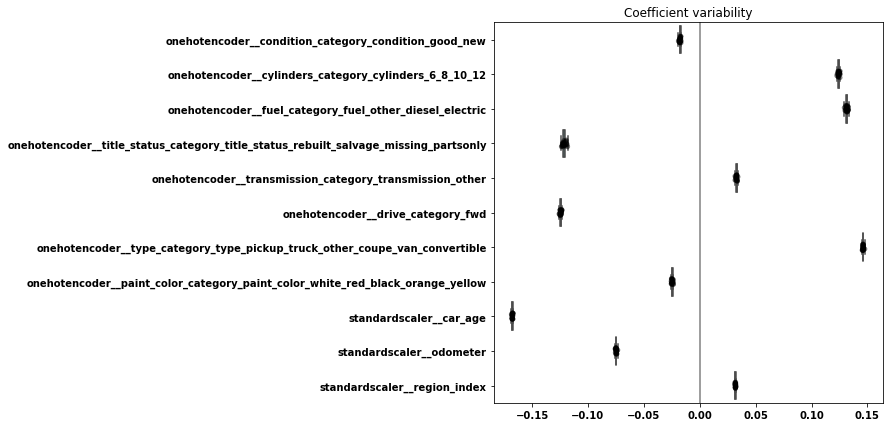

In [3256]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=100)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

## we see that none of the coeffients are varying a lot depending on the fold

## Using permutation feature importance to determine the important features

In [3257]:
## Logis used per SKlern
#we will shuffle this specific feature, keeping the other feature as is,
#and run our same model (already fitted) to predict the outcome. 
#The decrease of the score shall indicate how the model had
#used this feature to predict the target. The permutation feature importance 
#is defined to be the decrease in a model score when a single feature value is randomly shuffled.

In [3258]:
def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)

    permuted_score = model.score(X_permuted, y)
    return permuted_score

In [3259]:
def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """

    baseline_score_train = model.score(X, y)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance

In [3260]:
def permutation_importance(model, X, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in X.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, X, y, curr_feat))

        importances.append(list_feature_importance)

    return {'importances_mean': np.mean(importances, axis=1),
            'importances_std': np.std(importances, axis=1),
            'importances': importances}

In [3261]:
def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

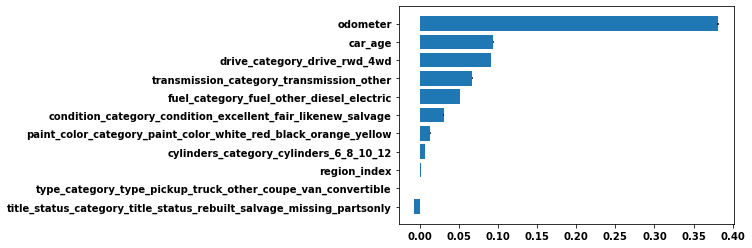

In [3262]:
perm_importance_result_train = permutation_importance(
    model3, X_train1, y_train1, n_repeats=10)

plot_feature_importances(perm_importance_result_train, X_train.columns)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

## A summary of all the models  is given below

| Feature   Names 	| OLS Model 1   with OHC and scaling 	| OLS Model 2   with OHC and scaling 	| Ridge   regressionwith OHC ,small regularization and no Scaling 	| Ridge with   OHC,small regularization and  Scaling 	| Ridge with OHC   with scaling and regularization after cross validation 	| Lasso with   OHC,scaling and regularization after Cross validation 	| Using permutation   feature importance 	|  	|
|:---:	|---	|---	|---	|---	|---	|---	|:---:	|---	|
| Transformation 	| None 	| Log transformation of the   Target Variable 	|  	|  	|  	|  	|   	|  	|
| type_category_type_pickup_truck_other_coupe_van_convertible 	| 5031.0 	| 0.140 	| 0.14543300 	| 0.1454330 	| 0.1454330 	| 0.1454330 	| 10 	|  	|
| fuel_category_fuel_other_diesel_electric 	| 5130.7 	| 0.120 	| 0.13152400 	| 0.1315240 	| 0.1315240 	| 0.1315240 	| 5 	|  	|
| cylinders_category_cylinders_6_8_10_12 	| 5039.8 	| 0.671 	| 0.12439100 	| 0.1243910 	| 0.1243910 	| 0.1243910 	| 8 	|  	|
| transmission_category_transmission_other 	| 789.6 	| 0.345 	| 0.03173000 	| 0.0317300 	| 0.0317300 	| 0.0317300 	| 4 	|  	|
| region_index 	| 66.2 	| 0.024 	| 0.00103500 	| 0.0010350 	| 0.0010350 	| 0.0010350 	| 9 	|  	|
| condition_category_condition_good_new 	| Not Selected 	| Not Selected 	| -0.01689600 	| -0.0168960 	| -0.0168960 	| -0.0168960 	| Not Selected 	|  	|
| paint_color_category_paint_color_white_red_black_orange_yellow 	| 1028.7 	| 0.628 	| -0.02309900 	| -0.0230990 	| -0.0230990 	| -0.0230990 	| 7 	|  	|
| car_age 	| -4999.8 	| -0.148 	| -0.02951500 	| -0.0000010 	| -0.0000010 	| -0.0000010 	| 2 	|  	|
| title_status_category_title_status_rebuilt_salvage_missing_partsonly 	| -3512.2 	| 0.221 	| -0.12341200 	| -0.1234120 	| -0.1234120 	| -0.1234120 	| 11 	|  	|
| drive_category_fwd 	| Not Selected 	| Not Selected 	| -0.12466700 	| -0.1246670 	| -0.1246670 	| -0.1246670 	| Not Selected 	|  	|
| odometer 	| -2902.9 	| -0.014 	| -0.00000100 	| -0.0295150 	| -0.0295150 	| -0.0295150 	| 1 	|  	|
| condition_category_condition_excellent_fair_likenew_salvage 	| 611.4 	| 0.585 	| Not Selected 	| Not Selected 	| Not Selected 	| Not Selected 	| 6 	|  	|
| drive_category_drive_rwd_4wd 	| 5484.8 	| 0.482 	| Not Selected 	| Not Selected 	| Not Selected 	| Not Selected 	| 3 	|  	|
| Model Accuracy 	|   	|   	|   	|   	|   	|   	|   	|  	|
| MAE($/car) 	| 4316 	| 4365 	| 3587 	| 3588 	| 3587 	| 3588 	|   	|  	|
|  	|  	|  	|  	|  	|  	|  	|  	|  	|
|  	|  	|  	|  	|  	|  	|  	|  	|  	|
|  	|  	|  	|  	|  	|  	|  	|  	|  	|
|  	|  	|  	|  	|  	|  	|  	|  	|  	|
|  	|  	|  	|  	|  	|  	|  	|  	|  	|

## insights on features that driver price of used car prices:
### from the above we can see that following about the features that drive the price of the car in the dataset
## Factors lower the median price of car
### -1) Car-age : negative impact meaning as car age increases median price of car reduces
###  -2) odometer- : negative impact meaning as odometer mile increases median price of car reduces
### - 3) title_status_category_title_status_rebuilt_salvage_missing_partsonly : negative impact when present as it                 is   an option present as it is an option
### - 4)  drive category-fwd : negative impact and when present as it is an option
###  -5) condition_category_condition_good_new: negative impact when present as it is an option
###  -6)paint_color_category_paint_color_white_red_black_orange_yellow: negative impact when present as it is an option
            
## Factors increase the median price of car          

### - 1)type category i.e whether is is pickup, van, coupe convertible increases median car price as an option
### - 2) fuel_category_fuel_other_diesel_electric: increases median car price as an option
### - 3) cylinders_category_cylinders_6_8_10_12:increases median car price as an option
### -  4)transmission_category_transmission_other:increases median car price as an option
###  - 5)region index increases median car price - hence higher index is better
### -6)These are mostly in line with the features with higher than mean price in box plots and reinforces the negative correlation of car price with age odomoter mileage

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [3270]:
# Checking the total number of car mdoels in the dataset

In [3274]:
len(df.model.value_counts())

29649

In [3276]:
#checking split of number of unique models by price point bins is given below

In [3277]:

df.groupby('price_bins')['model'].nunique()


price_bins
price less that 100              4555
price >= 500 and price<15000    17509
price >= 15000 & < 25000         8205
price >= 25000 & < 50000         7406
price >= 50000 & < 75000         1642
price >= 75000 & < 100000         544
price >= 100000 & < 150000        205
price >= 150000                   105
Name: model, dtype: int64

In [3278]:
#checking the revenue price point bins 

In [3279]:

df.groupby('price_bins')['price'].sum()

price_bins
price less that 100                  107878
price >= 500 and price<15000     1457433120
price >= 15000 & < 25000         1664361212
price >= 25000 & < 50000         3459620518
price >= 50000 & < 75000          638271687
price >= 75000 & < 100000         138336781
price >= 100000 & < 150000         58550680
price >= 150000                 24684281411
Name: price, dtype: int64

# Top 10 models Revenue generating models in the >50K category

In [3289]:
dfmodelsalessum=df.query('price>50000').groupby(['model']).agg({'price':'sum'}).sort_values(['price'],ascending=False)
dfmodelsalessum

,price
model,
tundra,3739573997
4runner,3737505181
benz s430,3024942282
benz e320,3024942282
wrangler,1414280846
...,...
cayman s,50500
karmann ghia,50350
"silverado z71**v8,5.3",50337


In [3290]:
# gettting cumulative sales from the top models

In [3291]:
dfmodelsalessum['grouped_cumulative_sum'] = (dfmodelsalessum.price.cumsum()/dfmodelsalessum.price.sum())*100
dfmodelsalessum

,price,grouped_cumulative_sum
model,,
tundra,3739573997,19.495181
4runner,3737505181,38.979576
benz s430,3024942282,54.749232
benz e320,3024942282,70.518889
wrangler,1414280846,77.891830
...,...,...
cayman s,50500,99.998950
karmann ghia,50350,99.999213
"silverado z71**v8,5.3",50337,99.999475


In [3293]:
dfmodelsalessum.reset_index(inplace=True)

In [3294]:
dfmodelsalessum

,model,price,grouped_cumulative_sum
0,tundra,3739573997,19.495181
1,4runner,3737505181,38.979576
2,benz s430,3024942282,54.749232
3,benz e320,3024942282,70.518889
4,wrangler,1414280846,77.891830
...,...,...,...
2085,cayman s,50500,99.998950
2086,karmann ghia,50350,99.999213
2087,"silverado z71**v8,5.3",50337,99.999475
2088,tahoe lt**leather*3rd,50337,99.999738


In [3295]:
# getting the list of top to models

In [3296]:
dftop10h=dfmodelsalessum.head(10)

In [3297]:
# generating the cumuative plot

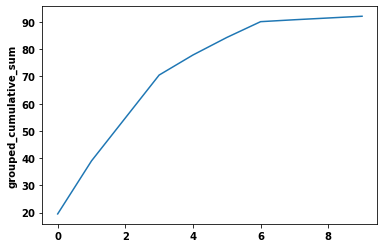

In [3298]:
sns.lineplot(dftop10h.index,dftop10h['grouped_cumulative_sum']);

# From the above we can see that 10 model account for 90% of the sales in the >50K category and the list of the models above may be used for inventory tunning

# Top Revenue generating models in the <50K category

In [3299]:
# generating a list of top models

In [3300]:
dfmodelsalessumunder50k=df.query('price<50000').groupby(['model']).agg({'price':'sum'}).\
sort_values(['price'],ascending=False)
dfmodelsalessumunder50k

,price
model,
f-150,151807146
silverado 1500,98194482
1500,82127407
2500,55105001
tacoma,52920347
...,...
silverado 3500hd/48km,0
silverado 4500hd work,0
silverado chassis cab,0


In [3301]:
## Generating cumulative revenue from top models

In [3302]:
dfmodelsalessumunder50k['grouped_cumulative_sum'] = \
(dfmodelsalessumunder50k.price.cumsum()/dfmodelsalessumunder50k.price.sum())*100
dfmodelsalessumunder50k

,price,grouped_cumulative_sum
model,,
f-150,151807146,2.325275
silverado 1500,98194482,3.829349
1500,82127407,5.087318
2500,55105001,5.931378
tacoma,52920347,6.741974
...,...,...
silverado 3500hd/48km,0,100.000000
silverado 4500hd work,0,100.000000
silverado chassis cab,0,100.000000


In [3303]:
##Resetting index
dfmodelsalessumunder50k.reset_index(inplace=True)

# Finding the number of models that constitute 90% of sales

In [3304]:
len(dfmodelsalessumunder50k.query('grouped_cumulative_sum<=80').index)

1774

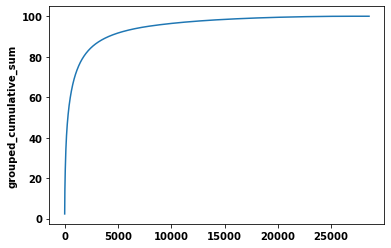

In [3305]:
sns.lineplot(dfmodelsalessumunder50k.index,dfmodelsalessumunder50k['grouped_cumulative_sum']);


# Plot of number of models against cumulative sum shows that around 1.8K of the total models contribute to around 90%  of sales
# The inventory of these 1.8K models needs to be manged carefully from an inventory perspective from a total of ~28K models